In [30]:


def ext_soft(data,model, model_vec, n_round = 5):
    

    
    prediction_soft = model.predict(data.X_reshaped)
    prediction_vec = model_vec.predict(data.X_reshaped)

#     prediction_soft = model.predict(data.X_mel_cqt)
#     prediction_vec = model_vec.predict(data.X_mel_cqt)
#     predicted_classes = np.argmax(prediction_soft, axis=1)
    

    
    f = 0
    softmax_val = []
    test_predict = []

    for j,i in enumerate(data.file_split_num):
        mean_vec = np.mean(prediction_vec[f:f + i],axis = 0)    
#         mean_soft = np.mean(prediction_soft[f:f + i],axis = 0) 
#         mean_soft = np.mean(prediction[f:f + i],axis = 0)
#         mean_soft = np.mean(np.power(prediction[f:f + i],2),axis = 0)
        
        softmax_val.append(np.round(mean_vec,n_round))
#         test_predict.append(mode(predicted_classes[f:f + i])[0][0])
        
        predicted_classes = np.argmax(np.mean(prediction_soft[f:f + i],axis = 0))
        test_predict.append(predicted_classes)
        f += i
    return np.array(softmax_val), np.array(test_predict)


import time
def make_pdf(data, pa):
    var_type = 'o' * data.shape[1]

    std_feature = np.std(data, axis=0)
    print(data.shape)
    d = data.shape[1]
    feature_length = data.shape[0]
    c = (4 / (d + 2) / feature_length) ** (1 / (d + 4))
    bw = std_feature * c
    print(bw)
#     print(bw.shape)
    # bw = bw.transpose()

    bw = bw * pa
    dens = sm.nonparametric.KDEMultivariate(data=data, var_type=var_type, bw=bw * pa)
    return dens

In [17]:
import sys
sys.path.append('C:/Users/GJ/PycharmProjects/2022SPCUP')

import import_ipynb
import eval_classes
import importlib
importlib.reload(eval_classes)

from eval_classes import *
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from tensorflow.keras.models import load_model


known_volume_path = 'C:/Users/GJ/PycharmProjects/2022SPCUP/part2_code/part2_full_train_4X5000'
# eval_volume_path = '../spc 


known_path, known_label_path = part2_file_path_list(known_volume_path,True)
# eval_path, eval_label_path = eval_file_path_list(eval_volume_path)


rs = 42

# pd_label =  pd.read_csv(known_label_path)
known_labels = known_label_path

knwon_train_path, known_test_path, y_train_raw, y_test_raw = train_test_split(np.array(known_path),
                                                                      known_labels, test_size=0.2,
                                                                      stratify = known_labels, random_state=rs)

n_mels = 64


train_data = data(knwon_train_path ,known_label_path,n_mels=n_mels)
# eval_data = data(eval_path ,eval_label_path,n_mels=n_mels)

for data in [train_data, eval_data]:
    data.extract_mel()
    data.reshape_data()
    
#     data.extract_cqt()
#     data.reshape_data_cqt_mel()

# X_train = train_data.X_reshaped
# X_eval = eval_data.X_reshaped



model = load_model('./best_model_noise/10_part2_label6_spcup_save_last.h5') #CNN_label_6_mel

model_vec = load_model('./best_model_noise/10_part2_label6_spcup_save_last.h5')


model_vec.pop()
model_vec.compile()
# model_vec.summary()


from scipy.stats import mode
n_round = 5
# train_soft, train_pred = ext_soft(train_data, model, model_vec, n_round)


../spcup_2022_eval_part2/labels_eval_part2.csv
self.X_split.shape :  (56971, 64, 32)
X_train.shape :  (56971, 64, 32, 1)


In [24]:
for data in [test_data]:
    data.extract_mel()
    data.reshape_data()

X_train.shape :  (104108, 64, 32, 1)


In [138]:
print(train_data.X_reshaped.shape)


(104108, 64, 32, 1)


In [166]:
# model = load_model('./best_model_noise/42_spcup_best.h5') #CNN_label_5_melspec
# model_vec = load_model('./best_model_noise/42_spcup_best.h5')

model = load_model('./best_model_noise/10_part2_label6_spcup_save_last.h5') #CNN_label_6_mel

model_vec = load_model('./best_model_noise/10_part2_label6_spcup_save_last.h5')


model_vec.pop()
model_vec.compile()
# model_vec.summary()


from scipy.stats import mode
n_round = 5
train_soft, train_pred = ext_soft(train_data, model, model_vec, n_round)
eval_soft, eval_pred = ext_soft(eval_data, model, model_vec, n_round)

len(eval_pred[eval_pred==5])

from sklearn.preprocessing import RobustScaler
# scaler = StandardScaler()
scaler = RobustScaler()
train_sc = scaler.fit_transform(train_soft)
eval_sc = scaler.fit_transform(eval_soft)

print(train_sc[:3])
print(eval_sc[:3])

pa = 0.03
dens = make_pdf(train_sc, pa)

pdf_tr = dens.pdf(train_sc)
pdf = dens.pdf(eval_sc)

pdf = pdf/max(pdf_tr)

for k in range(6):
    print(len(eval_pred[eval_pred == k]))
#     print(len(mkde_eval_pred[mkde_eval_pred == k]))    
print('\n')

import copy
mkde_eval_pred = copy.copy(eval_pred)

[[ 0.78737295 -0.8485186   0.9296116  -0.5375698   1.9802253  -0.20490935]
 [ 1.5065674  -0.8365212   0.3568811  -0.7164787   0.72363085  0.68811053]
 [ 0.5656476  -0.4652011  -1.2669623   0.28699172  2.3057518  -0.44142628]]
[[ 1.3389001  -0.9851833   0.38056007 -0.7634788   0.86310095  0.6888271 ]
 [-0.2437169  -0.03844559 -0.95930547  2.8203943   0.28114757 -0.8684795 ]
 [ 0.9431064  -0.87161964 -0.06207868 -0.84009427  2.4051018  -0.02611711]]
(16000, 6)
[0.2427831  0.21902531 0.29798952 0.41044584 0.359656   0.24987896]
1484
1504
1561
1503
1800
1148




In [165]:
# librosa.__version__
appdirs.__version__

NameError: name 'appdirs' is not defined

In [142]:
np.save('part2_train_sc_robust',train_sc)

In [167]:
for k in range(6):
    print(len(eval_pred[eval_pred == k]))

print('\n')
# thresh = 6e-07
mkde_eval_pred = copy.copy(eval_pred)
# print(mkde_eval_pred[np.where(pdf<thresh)[0]] )
# mkde_eval_pred[np.where(pdf<thresh)[0]] = 5
# print(mkde_eval_pred[np.where(pdf<thresh)[0]] )


for i, thresh in enumerate([1e-9 , 1e-9 ,1e-9, 1e-9 ,7e-6]):
    idx_label = np.where(mkde_eval_pred == i)[0]
    idx_thresh = np.where(pdf[idx_label]<thresh)[0]
    idx = idx_label[idx_thresh]
    mkde_eval_pred[idx] = 5
print('eval   :', end = '  ')
for k in [ 1525, 1513, 1492, 1494, 1488, 1483]:    
    print(k, end = '  ')  
print('')
print('mkde x :', end = '  ')
for k in range(6):
    
    print(len(eval_pred[eval_pred == k]), end = '  ')
print('')
print('mkde o :', end = '  ')
for k in range(6):
    print(len(mkde_eval_pred[mkde_eval_pred == k]),end = '  ')    

1484
1504
1561
1503
1800
1148


eval   :  1525  1513  1492  1494  1488  1483  
mkde x :  1484  1504  1561  1503  1800  1148  
mkde o :  1484  1504  1561  1503  1736  1212  

In [ ]:
eval   :  1525  1513  1492  1494  1488  1483  
mkde x :  1484  1504  1561  1503  1800  1148  
mkde o :  1484  1504  1561  1503  1729  1219

In [60]:
thresh = 0.0042
eval_pred[np.where(pdf<thresh)[0]] = 5
print(len(eval_pred[eval_pred == 5]))

2051


9000


704 3e-06
791 4e-06
866 4.9999999999999996e-06
920 5.999999999999999e-06
971 6.999999999999999e-06
1018 7.999999999999998e-06
1064 8.999999999999999e-06
1103 9.999999999999999e-06
1151 1.0999999999999998e-05
1183 1.1999999999999999e-05
1220 1.2999999999999998e-05
1250 1.3999999999999996e-05
1275 1.4999999999999997e-05
1306 1.5999999999999996e-05
1342 1.6999999999999996e-05
1368 1.7999999999999997e-05
1393 1.8999999999999994e-05
1414 1.9999999999999998e-05
1440 2.0999999999999995e-05
1455 2.1999999999999993e-05
1469 2.2999999999999997e-05
1485 2.3999999999999994e-05
1503 2.499999999999999e-05
1522 2.5999999999999995e-05
1538 2.6999999999999992e-05
1559 2.7999999999999996e-05
1570 2.8999999999999993e-05
1591 2.999999999999999e-05
1607 3.0999999999999995e-05
1622 3.199999999999999e-05
1638 3.299999999999999e-05
1649 3.399999999999999e-05
1669 3.499999999999999e-05
1679 3.599999999999999e-05
1698 3.699999999999999e-05
1711 3.799999999999999e-05
1720 3.899999999999999e-05
1734 3.99999999999

4450 0.0006339999999999998
4451 0.0006349999999999998
4452 0.0006359999999999998
4453 0.0006369999999999998
4459 0.0006379999999999998
4461 0.0006389999999999998
4466 0.0006399999999999998
4470 0.0006409999999999998
4473 0.0006419999999999998
4475 0.0006429999999999998
4477 0.0006439999999999998
4479 0.0006449999999999998
4480 0.0006459999999999998
4482 0.0006469999999999998
4482 0.0006479999999999998
4483 0.0006489999999999998
4487 0.0006499999999999998
4490 0.0006509999999999998
4497 0.0006519999999999998
4497 0.0006529999999999998
4498 0.0006539999999999999
4502 0.0006549999999999998
4505 0.0006559999999999998
4507 0.0006569999999999998
4512 0.0006579999999999998
4514 0.0006589999999999998
4518 0.0006599999999999998
4519 0.0006609999999999998
4521 0.0006619999999999998
4525 0.0006629999999999997
4526 0.0006639999999999998
4528 0.0006649999999999998
4532 0.0006659999999999998
4533 0.0006669999999999998
4533 0.0006679999999999998
4537 0.0006689999999999998
4540 0.0006699999999999998
4

5667 0.0012789999999999995
5672 0.0012799999999999997
5676 0.0012809999999999996
5677 0.0012819999999999997
5680 0.0012829999999999996
5680 0.0012839999999999996
5682 0.0012849999999999997
5682 0.0012859999999999996
5685 0.0012869999999999997
5687 0.0012879999999999996
5687 0.0012889999999999996
5688 0.0012899999999999997
5689 0.0012909999999999996
5689 0.0012919999999999995
5690 0.0012929999999999997
5692 0.0012939999999999996
5694 0.0012949999999999997
5694 0.0012959999999999996
5696 0.0012969999999999995
5696 0.0012979999999999997
5697 0.0012989999999999996
5698 0.0012999999999999997
5699 0.0013009999999999996
5699 0.0013019999999999996
5699 0.0013029999999999997
5701 0.0013039999999999996
5702 0.0013049999999999997
5703 0.0013059999999999997
5704 0.0013069999999999996
5705 0.0013079999999999997
5707 0.0013089999999999996
5708 0.0013099999999999995
5711 0.0013109999999999997
5713 0.0013119999999999996
5713 0.0013129999999999997
5714 0.0013139999999999996
5716 0.0013149999999999995
5

6598 0.0020139999999999993
6598 0.0020149999999999994
6599 0.0020159999999999996
6599 0.0020169999999999993
6599 0.0020179999999999994
6601 0.0020189999999999995
6601 0.0020199999999999997
6601 0.0020209999999999994
6604 0.0020219999999999995
6604 0.0020229999999999996
6604 0.0020239999999999993
6604 0.0020249999999999995
6604 0.0020259999999999996
6605 0.0020269999999999993
6606 0.0020279999999999994
6608 0.0020289999999999996
6611 0.0020299999999999993
6611 0.0020309999999999994
6611 0.0020319999999999995
6613 0.0020329999999999997
6613 0.0020339999999999994
6615 0.0020349999999999995
6616 0.0020359999999999996
6616 0.0020369999999999993
6617 0.0020379999999999994
6618 0.0020389999999999996
6619 0.0020399999999999993
6619 0.0020409999999999994
6620 0.0020419999999999995
6620 0.0020429999999999992
6622 0.0020439999999999994
6622 0.0020449999999999995
6623 0.0020459999999999996
6624 0.0020469999999999993
6624 0.0020479999999999995
6624 0.0020489999999999996
6626 0.0020499999999999993
6

7187 0.0027629999999999994
7188 0.002763999999999999
7189 0.0027649999999999992
7189 0.0027659999999999994
7189 0.002766999999999999
7190 0.002767999999999999
7191 0.0027689999999999993
7191 0.0027699999999999995
7191 0.002770999999999999
7192 0.0027719999999999993
7193 0.0027729999999999994
7193 0.002773999999999999
7193 0.0027749999999999993
7194 0.0027759999999999994
7194 0.002776999999999999
7194 0.0027779999999999992
7194 0.0027789999999999994
7194 0.002779999999999999
7194 0.002780999999999999
7194 0.0027819999999999993
7194 0.0027829999999999994
7197 0.002783999999999999
7197 0.0027849999999999993
7198 0.0027859999999999994
7198 0.002786999999999999
7198 0.0027879999999999992
7200 0.0027889999999999994
7201 0.002789999999999999
7201 0.002790999999999999
7203 0.0027919999999999993
7203 0.002792999999999999
7204 0.002793999999999999
7205 0.0027949999999999993
7205 0.0027959999999999994
7205 0.002796999999999999
7205 0.0027979999999999993
7205 0.0027989999999999994
7205 0.002799999

7621 0.003530999999999999
7622 0.003531999999999999
7622 0.0035329999999999992
7623 0.003533999999999999
7624 0.003534999999999999
7624 0.003535999999999999
7624 0.003536999999999999
7624 0.003537999999999999
7624 0.003538999999999999
7624 0.003539999999999999
7624 0.003540999999999999
7625 0.003541999999999999
7626 0.003542999999999999
7626 0.003543999999999999
7626 0.003544999999999999
7626 0.0035459999999999992
7627 0.003546999999999999
7627 0.003547999999999999
7627 0.003548999999999999
7627 0.003549999999999999
7628 0.003550999999999999
7628 0.003551999999999999
7628 0.003552999999999999
7630 0.003553999999999999
7631 0.003554999999999999
7631 0.0035559999999999993
7632 0.003556999999999999
7632 0.003557999999999999
7632 0.0035589999999999992
7632 0.003559999999999999
7632 0.003560999999999999
7633 0.003561999999999999
7634 0.003562999999999999
7635 0.003563999999999999
7635 0.003564999999999999
7637 0.003565999999999999
7637 0.003566999999999999
7638 0.003567999999999999
7638 0.0

7917 0.004279999999999999
7918 0.004280999999999999
7918 0.004281999999999999
7919 0.0042829999999999995
7919 0.004284
7919 0.004284999999999999
7919 0.004285999999999999
7919 0.004286999999999999
7919 0.004287999999999999
7919 0.004288999999999999
7920 0.0042899999999999995
7920 0.004291
7920 0.004291999999999999
7921 0.004292999999999999
7922 0.004293999999999999
7922 0.004294999999999999
7922 0.0042959999999999995
7922 0.004297
7922 0.004297999999999999
7923 0.004298999999999999
7923 0.004299999999999999
7924 0.004300999999999999
7924 0.004301999999999999
7924 0.0043029999999999995
7925 0.004304
7926 0.004304999999999999
7926 0.004305999999999999
7926 0.004306999999999999
7928 0.004307999999999999
7928 0.0043089999999999995
7928 0.00431
7928 0.004310999999999999
7928 0.004311999999999999
7929 0.004312999999999999
7929 0.004313999999999999
7929 0.004314999999999999
7929 0.0043159999999999995
7929 0.004317
7929 0.004317999999999999
7929 0.004318999999999999
7929 0.004319999999999999
7

8175 0.0050409999999999995
8175 0.005041999999999999
8176 0.005042999999999999
8176 0.005043999999999999
8176 0.005044999999999999
8176 0.005045999999999999
8176 0.005046999999999999
8176 0.005047999999999999
8176 0.005048999999999999
8176 0.005049999999999999
8176 0.005050999999999999
8177 0.005051999999999999
8177 0.005052999999999999
8178 0.0050539999999999995
8178 0.005054999999999999
8178 0.005055999999999999
8178 0.005056999999999999
8178 0.005057999999999999
8178 0.005058999999999999
8178 0.005059999999999999
8179 0.0050609999999999995
8179 0.005061999999999999
8180 0.005062999999999999
8180 0.005063999999999999
8180 0.005064999999999999
8180 0.005065999999999999
8180 0.0050669999999999995
8180 0.005067999999999999
8182 0.005068999999999999
8182 0.005069999999999999
8182 0.005070999999999999
8183 0.005071999999999999
8185 0.005072999999999999
8185 0.0050739999999999995
8185 0.005074999999999999
8185 0.005075999999999999
8186 0.005076999999999999
8186 0.005077999999999999
8187 0.

8349 0.005805999999999999
8349 0.005806999999999999
8349 0.005807999999999999
8349 0.005808999999999999
8349 0.005809999999999999
8349 0.005810999999999999
8349 0.005811999999999999
8349 0.005812999999999999
8349 0.005813999999999999
8350 0.005814999999999999
8350 0.005815999999999999
8350 0.005816999999999999
8350 0.0058179999999999985
8350 0.005818999999999999
8350 0.005819999999999999
8350 0.005820999999999999
8350 0.005821999999999999
8350 0.005822999999999999
8350 0.005823999999999999
8350 0.005824999999999999
8350 0.005825999999999999
8350 0.005826999999999999
8350 0.005827999999999999
8350 0.005828999999999999
8350 0.005829999999999999
8350 0.0058309999999999985
8351 0.005831999999999999
8351 0.005832999999999999
8352 0.005833999999999999
8352 0.005834999999999999
8352 0.005835999999999999
8352 0.005836999999999999
8353 0.005837999999999999
8353 0.005838999999999999
8354 0.005839999999999999
8354 0.005840999999999999
8354 0.005841999999999999
8354 0.005842999999999999
8354 0.005

8495 0.006577999999999999
8495 0.006578999999999999
8495 0.006579999999999999
8495 0.006580999999999998
8495 0.0065819999999999984
8495 0.006582999999999999
8495 0.006583999999999999
8495 0.006584999999999999
8496 0.006585999999999999
8496 0.006586999999999999
8496 0.006587999999999998
8496 0.0065889999999999985
8496 0.006589999999999999
8496 0.006590999999999999
8496 0.006591999999999999
8496 0.006592999999999999
8496 0.006593999999999998
8496 0.006594999999999998
8496 0.0065959999999999986
8496 0.006596999999999999
8496 0.006597999999999999
8497 0.006598999999999999
8497 0.006599999999999999
8497 0.006600999999999998
8497 0.0066019999999999985
8497 0.006602999999999999
8497 0.006603999999999999
8497 0.006604999999999999
8497 0.006605999999999999
8497 0.006606999999999998
8497 0.006607999999999998
8497 0.0066089999999999986
8497 0.006609999999999999
8497 0.006610999999999999
8497 0.006611999999999999
8497 0.006612999999999999
8497 0.006613999999999998
8497 0.0066149999999999985
8497 0

8574 0.007336999999999999
8574 0.007337999999999998
8574 0.007338999999999998
8574 0.0073399999999999984
8574 0.007340999999999999
8574 0.007341999999999999
8574 0.007342999999999999
8575 0.007343999999999998
8575 0.007344999999999998
8575 0.007345999999999998
8575 0.0073469999999999985
8575 0.007347999999999999
8575 0.007348999999999999
8575 0.007349999999999999
8576 0.007350999999999998
8576 0.007351999999999998
8576 0.007352999999999998
8576 0.0073539999999999986
8576 0.007354999999999999
8576 0.007355999999999999
8576 0.007356999999999998
8576 0.007357999999999998
8576 0.007358999999999998
8577 0.0073599999999999985
8577 0.007360999999999999
8578 0.007361999999999999
8578 0.007362999999999999
8578 0.007363999999999998
8578 0.007364999999999998
8578 0.007365999999999998
8579 0.0073669999999999985
8580 0.007367999999999999
8581 0.007368999999999999
8581 0.007369999999999998
8581 0.007370999999999998
8581 0.007371999999999998
8581 0.0073729999999999985
8581 0.007373999999999999
8581 0

8659 0.008096999999999998
8660 0.008097999999999998
8660 0.008098999999999997
8660 0.008099999999999998
8660 0.008100999999999997
8660 0.008101999999999998
8660 0.008102999999999997
8660 0.008103999999999997
8661 0.008104999999999998
8661 0.008105999999999997
8661 0.008106999999999998
8661 0.008107999999999997
8662 0.008108999999999998
8662 0.008109999999999997
8663 0.008110999999999997
8663 0.008111999999999998
8663 0.008112999999999997
8663 0.008113999999999998
8663 0.008114999999999997
8664 0.008115999999999998
8664 0.008116999999999997
8664 0.008117999999999997
8664 0.008118999999999998
8664 0.008119999999999997
8664 0.008120999999999998
8664 0.008121999999999997
8664 0.008122999999999998
8664 0.008123999999999998
8664 0.008124999999999997
8664 0.008125999999999998
8664 0.008126999999999997
8664 0.008127999999999998
8664 0.008128999999999997
8664 0.008129999999999997
8664 0.008130999999999998
8664 0.008131999999999997
8664 0.008132999999999998
8664 0.008133999999999997
8664 0.00813

8734 0.008847999999999996
8734 0.008848999999999997
8735 0.008849999999999997
8735 0.008850999999999998
8735 0.008851999999999997
8735 0.008852999999999998
8735 0.008853999999999997
8735 0.008854999999999997
8735 0.008855999999999998
8736 0.008856999999999997
8736 0.008857999999999998
8736 0.008858999999999997
8736 0.008859999999999998
8736 0.008860999999999997
8736 0.008861999999999997
8736 0.008862999999999998
8736 0.008863999999999997
8736 0.008864999999999998
8736 0.008865999999999997
8736 0.008866999999999996
8736 0.008867999999999997
8736 0.008868999999999997
8736 0.008869999999999998
8736 0.008870999999999997
8736 0.008871999999999998
8737 0.008872999999999997
8737 0.008873999999999996
8737 0.008874999999999997
8737 0.008875999999999997
8737 0.008876999999999998
8737 0.008877999999999997
8737 0.008878999999999998
8737 0.008879999999999997
8737 0.008880999999999997
8737 0.008881999999999998
8737 0.008882999999999997
8737 0.008883999999999998
8737 0.008884999999999997
8737 0.00888

8781 0.009631999999999996
8781 0.009632999999999997
8781 0.009633999999999997
8781 0.009634999999999998
8781 0.009635999999999997
8781 0.009636999999999996
8781 0.009637999999999997
8781 0.009638999999999997
8781 0.009639999999999998
8781 0.009640999999999997
8781 0.009641999999999998
8781 0.009642999999999997
8782 0.009643999999999996
8782 0.009644999999999997
8782 0.009645999999999997
8782 0.009646999999999998
8782 0.009647999999999997
8782 0.009648999999999998
8782 0.009649999999999997
8782 0.009650999999999996
8782 0.009651999999999997
8782 0.009652999999999997
8782 0.009653999999999998
8782 0.009654999999999997
8782 0.009655999999999996
8782 0.009656999999999997
8782 0.009657999999999996
8782 0.009658999999999997
8782 0.009659999999999997
8782 0.009660999999999998
8782 0.009661999999999997
8782 0.009662999999999996
8782 0.009663999999999997
8782 0.009664999999999997
8782 0.009665999999999998
8782 0.009666999999999997
8782 0.009667999999999998
8783 0.009668999999999997
8783 0.00966

8820 0.010428999999999997
8820 0.010429999999999997
8820 0.010430999999999998
8820 0.010431999999999997
8820 0.010432999999999996
8820 0.010433999999999997
8820 0.010434999999999996
8820 0.010435999999999997
8820 0.010436999999999997
8820 0.010437999999999998
8820 0.010438999999999997
8820 0.010439999999999996
8820 0.010440999999999997
8820 0.010441999999999996
8820 0.010442999999999997
8820 0.010443999999999997
8820 0.010444999999999998
8820 0.010445999999999997
8820 0.010446999999999996
8820 0.010447999999999997
8820 0.010448999999999996
8820 0.010449999999999997
8820 0.010450999999999997
8820 0.010451999999999996
8820 0.010452999999999997
8820 0.010453999999999996
8820 0.010454999999999997
8820 0.010455999999999997
8820 0.010456999999999998
8820 0.010457999999999997
8820 0.010458999999999996
8820 0.010459999999999997
8820 0.010460999999999996
8820 0.010461999999999997
8820 0.010462999999999997
8820 0.010463999999999998
8820 0.010464999999999997
8820 0.010465999999999996
8820 0.01046

8843 0.011215999999999997
8843 0.011216999999999996
8843 0.011217999999999997
8843 0.011218999999999996
8843 0.011219999999999997
8843 0.011220999999999997
8843 0.011221999999999996
8843 0.011222999999999997
8843 0.011223999999999996
8843 0.011224999999999997
8843 0.011225999999999996
8843 0.011226999999999997
8843 0.011227999999999997
8843 0.011228999999999996
8843 0.011229999999999997
8843 0.011230999999999996
8843 0.011231999999999997
8843 0.011232999999999996
8843 0.011233999999999997
8843 0.011234999999999997
8843 0.011235999999999996
8844 0.011236999999999997
8844 0.011237999999999996
8844 0.011238999999999997
8844 0.011239999999999997
8844 0.011240999999999996
8844 0.011241999999999997
8844 0.011242999999999996
8844 0.011243999999999997
8844 0.011244999999999996
8844 0.011245999999999997
8844 0.011246999999999997
8844 0.011247999999999996
8844 0.011248999999999997
8844 0.011249999999999996
8844 0.011250999999999997
8844 0.011251999999999996
8844 0.011252999999999997
8844 0.01125

8882 0.011999999999999997
8882 0.012000999999999996
8882 0.012001999999999997
8882 0.012002999999999996
8882 0.012003999999999997
8882 0.012004999999999997
8882 0.012005999999999996
8882 0.012006999999999997
8882 0.012007999999999996
8882 0.012008999999999997
8882 0.012009999999999996
8882 0.012010999999999996
8882 0.012011999999999997
8882 0.012012999999999996
8882 0.012013999999999997
8882 0.012014999999999996
8882 0.012015999999999997
8882 0.012016999999999996
8882 0.012017999999999996
8882 0.012018999999999997
8882 0.012019999999999996
8882 0.012020999999999997
8882 0.012021999999999996
8882 0.012022999999999997
8882 0.012023999999999996
8882 0.012024999999999996
8882 0.012025999999999997
8882 0.012026999999999996
8882 0.012027999999999997
8882 0.012028999999999996
8882 0.012029999999999997
8882 0.012030999999999997
8882 0.012031999999999996
8882 0.012032999999999997
8882 0.012033999999999996
8882 0.012034999999999997
8882 0.012035999999999996
8882 0.012036999999999996
8882 0.01203

8902 0.012794999999999996
8902 0.012795999999999997
8902 0.012796999999999996
8902 0.012797999999999997
8902 0.012798999999999996
8902 0.012799999999999995
8902 0.012800999999999996
8902 0.012801999999999996
8902 0.012802999999999997
8902 0.012803999999999996
8902 0.012804999999999997
8902 0.012805999999999996
8902 0.012806999999999995
8902 0.012807999999999996
8902 0.012808999999999996
8902 0.012809999999999997
8902 0.012810999999999996
8902 0.012811999999999997
8902 0.012812999999999996
8902 0.012813999999999996
8902 0.012814999999999997
8902 0.012815999999999996
8902 0.012816999999999997
8902 0.012817999999999996
8902 0.012818999999999997
8902 0.012819999999999996
8902 0.012820999999999996
8902 0.012821999999999997
8902 0.012822999999999996
8902 0.012823999999999997
8902 0.012824999999999996
8902 0.012825999999999995
8902 0.012826999999999996
8902 0.012827999999999996
8902 0.012828999999999997
8902 0.012829999999999996
8902 0.012830999999999997
8902 0.012831999999999996
8902 0.01283

8916 0.013580999999999996
8916 0.013581999999999997
8916 0.013582999999999996
8916 0.013583999999999995
8916 0.013584999999999996
8916 0.013585999999999996
8916 0.013586999999999997
8916 0.013587999999999996
8916 0.013588999999999995
8916 0.013589999999999996
8916 0.013590999999999995
8916 0.013591999999999996
8916 0.013592999999999996
8916 0.013593999999999997
8916 0.013594999999999996
8916 0.013595999999999995
8916 0.013596999999999996
8916 0.013597999999999996
8916 0.013598999999999997
8916 0.013599999999999996
8916 0.013600999999999997
8916 0.013601999999999996
8916 0.013602999999999995
8916 0.013603999999999996
8916 0.013604999999999996
8916 0.013605999999999997
8916 0.013606999999999996
8916 0.013607999999999997
8916 0.013608999999999996
8916 0.013609999999999995
8916 0.013610999999999996
8916 0.013611999999999996
8916 0.013612999999999997
8916 0.013613999999999996
8916 0.013614999999999997
8916 0.013615999999999996
8916 0.013616999999999995
8916 0.013617999999999996
8916 0.01361

8934 0.014370999999999997
8934 0.014371999999999996
8934 0.014372999999999995
8934 0.014373999999999996
8934 0.014374999999999995
8934 0.014375999999999996
8934 0.014376999999999996
8934 0.014377999999999997
8934 0.014378999999999996
8934 0.014379999999999995
8934 0.014380999999999996
8934 0.014381999999999995
8934 0.014382999999999996
8934 0.014383999999999996
8934 0.014384999999999995
8934 0.014385999999999996
8934 0.014386999999999995
8934 0.014387999999999996
8934 0.014388999999999996
8934 0.014389999999999997
8934 0.014390999999999996
8934 0.014391999999999995
8934 0.014392999999999996
8934 0.014393999999999995
8934 0.014394999999999996
8935 0.014395999999999996
8935 0.014396999999999997
8935 0.014397999999999996
8935 0.014398999999999995
8935 0.014399999999999996
8935 0.014400999999999995
8935 0.014401999999999996
8935 0.014402999999999996
8935 0.014403999999999997
8935 0.014404999999999996
8935 0.014405999999999995
8935 0.014406999999999996
8935 0.014407999999999995
8935 0.01440

8941 0.015175999999999995
8941 0.015176999999999996
8941 0.015177999999999995
8941 0.015178999999999996
8941 0.015179999999999996
8941 0.015180999999999995
8941 0.015181999999999996
8941 0.015182999999999995
8941 0.015183999999999996
8941 0.015184999999999995
8941 0.015185999999999996
8941 0.015186999999999996
8941 0.015187999999999995
8941 0.015188999999999996
8941 0.015189999999999995
8941 0.015190999999999996
8941 0.015191999999999995
8941 0.015192999999999996
8941 0.015193999999999996
8941 0.015194999999999995
8941 0.015195999999999996
8941 0.015196999999999995
8941 0.015197999999999996
8941 0.015198999999999995
8941 0.015199999999999995
8941 0.015200999999999996
8941 0.015201999999999995
8941 0.015202999999999996
8941 0.015203999999999995
8941 0.015204999999999996
8941 0.015205999999999996
8941 0.015206999999999995
8941 0.015207999999999996
8941 0.015208999999999995
8941 0.015209999999999996
8941 0.015210999999999995
8941 0.015211999999999996
8941 0.015212999999999996
8941 0.01521

8947 0.015964999999999997
8947 0.015965999999999994
8947 0.015966999999999995
8947 0.015967999999999996
8947 0.015968999999999997
8947 0.015969999999999995
8947 0.015970999999999996
8947 0.015971999999999997
8947 0.015972999999999994
8947 0.015973999999999995
8947 0.015974999999999996
8947 0.015975999999999997
8947 0.015976999999999995
8947 0.015977999999999996
8947 0.015978999999999997
8947 0.015979999999999994
8947 0.015980999999999995
8947 0.015981999999999996
8947 0.015982999999999994
8947 0.015983999999999995
8947 0.015984999999999996
8947 0.015985999999999997
8947 0.015986999999999994
8947 0.015987999999999995
8947 0.015988999999999996
8947 0.015989999999999994
8947 0.015990999999999995
8947 0.015991999999999996
8947 0.015992999999999997
8947 0.015993999999999994
8947 0.015994999999999995
8947 0.015995999999999996
8947 0.015996999999999994
8948 0.015997999999999995
8948 0.015998999999999996
8948 0.015999999999999997
8948 0.016000999999999994
8948 0.016001999999999995
8948 0.01600

8955 0.016761999999999996
8955 0.016762999999999997
8955 0.016763999999999994
8955 0.016764999999999995
8955 0.016765999999999996
8955 0.016766999999999994
8955 0.016767999999999995
8955 0.016768999999999996
8955 0.016769999999999997
8955 0.016770999999999994
8955 0.016771999999999995
8955 0.016772999999999996
8955 0.016773999999999994
8955 0.016774999999999995
8955 0.016775999999999996
8955 0.016776999999999997
8955 0.016777999999999994
8955 0.016778999999999995
8955 0.016779999999999996
8955 0.016780999999999994
8955 0.016781999999999995
8955 0.016782999999999996
8955 0.016783999999999997
8955 0.016784999999999994
8955 0.016785999999999995
8955 0.016786999999999996
8955 0.016787999999999994
8955 0.016788999999999995
8955 0.016789999999999996
8955 0.016790999999999997
8955 0.016791999999999994
8955 0.016792999999999995
8955 0.016793999999999996
8955 0.016794999999999994
8955 0.016795999999999995
8955 0.016796999999999996
8955 0.016797999999999993
8955 0.016798999999999994
8955 0.01679

8963 0.017566999999999996
8963 0.017567999999999993
8963 0.017568999999999994
8963 0.017569999999999995
8963 0.017570999999999996
8963 0.017571999999999994
8963 0.017572999999999995
8963 0.017573999999999996
8963 0.017574999999999993
8963 0.017575999999999994
8963 0.017576999999999995
8963 0.017577999999999996
8963 0.017578999999999994
8963 0.017579999999999995
8963 0.017580999999999996
8963 0.017581999999999993
8963 0.017582999999999994
8963 0.017583999999999995
8963 0.017584999999999996
8963 0.017585999999999994
8963 0.017586999999999995
8963 0.017587999999999996
8963 0.017588999999999994
8963 0.017589999999999995
8963 0.017590999999999996
8963 0.017591999999999997
8963 0.017592999999999994
8963 0.017593999999999995
8963 0.017594999999999996
8963 0.017595999999999994
8963 0.017596999999999995
8963 0.017597999999999996
8963 0.017598999999999997
8963 0.017599999999999994
8963 0.017600999999999995
8963 0.017601999999999996
8963 0.017602999999999994
8963 0.017603999999999995
8963 0.01760

8969 0.018375999999999997
8969 0.018376999999999994
8969 0.018377999999999995
8969 0.018378999999999996
8969 0.018379999999999994
8969 0.018380999999999995
8969 0.018381999999999996
8969 0.018382999999999993
8969 0.018383999999999994
8969 0.018384999999999995
8969 0.018385999999999996
8969 0.018386999999999994
8969 0.018387999999999995
8969 0.018388999999999996
8969 0.018389999999999993
8969 0.018390999999999994
8969 0.018391999999999995
8969 0.018392999999999996
8969 0.018393999999999994
8969 0.018394999999999995
8969 0.018395999999999996
8969 0.018396999999999993
8969 0.018397999999999994
8969 0.018398999999999995
8969 0.018399999999999996
8969 0.018400999999999994
8969 0.018401999999999995
8969 0.018402999999999996
8969 0.018403999999999993
8969 0.018404999999999994
8969 0.018405999999999995
8969 0.018406999999999996
8969 0.018407999999999994
8969 0.018408999999999995
8969 0.018409999999999996
8969 0.018410999999999993
8969 0.018411999999999994
8969 0.018412999999999995
8969 0.01841

8974 0.019179999999999996
8974 0.019180999999999993
8974 0.019181999999999994
8974 0.019182999999999995
8974 0.019183999999999996
8974 0.019184999999999994
8974 0.019185999999999995
8974 0.019186999999999996
8974 0.019187999999999993
8974 0.019188999999999994
8974 0.019189999999999995
8974 0.019190999999999996
8974 0.019191999999999994
8974 0.019192999999999995
8974 0.019193999999999996
8974 0.019194999999999993
8974 0.019195999999999994
8974 0.019196999999999995
8974 0.019197999999999996
8974 0.019198999999999994
8974 0.019199999999999995
8974 0.019200999999999996
8974 0.019201999999999993
8974 0.019202999999999994
8974 0.019203999999999995
8974 0.019204999999999993
8974 0.019205999999999994
8974 0.019206999999999995
8974 0.019207999999999996
8974 0.019208999999999993
8974 0.019209999999999994
8974 0.019210999999999995
8974 0.019211999999999993
8974 0.019212999999999994
8974 0.019213999999999995
8974 0.019214999999999996
8974 0.019215999999999994
8974 0.019216999999999995
8974 0.01921

8977 0.019976999999999995
8977 0.019977999999999996
8977 0.019978999999999993
8977 0.019979999999999994
8977 0.019980999999999995
8977 0.019981999999999993
8977 0.019982999999999994
8977 0.019983999999999995
8977 0.019984999999999996
8977 0.019985999999999993
8977 0.019986999999999994
8977 0.019987999999999995
8977 0.019988999999999993
8977 0.019989999999999994
8977 0.019990999999999995
8977 0.019991999999999996
8977 0.019992999999999993
8977 0.019993999999999994
8977 0.019994999999999995
8977 0.019995999999999993
8977 0.019996999999999994
8977 0.019997999999999995
8977 0.019998999999999996
8977 0.019999999999999993
8977 0.020000999999999994
8977 0.020001999999999995
8977 0.020002999999999993
8977 0.020003999999999994
8977 0.020004999999999995
8977 0.020005999999999996
8977 0.020006999999999994
8977 0.020007999999999995
8977 0.020008999999999996
8977 0.020009999999999993
8977 0.020010999999999994
8977 0.020011999999999995
8977 0.020012999999999996
8977 0.020013999999999994
8977 0.02001

8982 0.020769999999999993
8982 0.020770999999999994
8982 0.020771999999999995
8982 0.020772999999999993
8982 0.020773999999999994
8982 0.020774999999999995
8982 0.020775999999999996
8982 0.020776999999999993
8982 0.020777999999999994
8982 0.020778999999999995
8982 0.020779999999999993
8982 0.020780999999999994
8982 0.020781999999999995
8982 0.020782999999999996
8982 0.020783999999999993
8982 0.020784999999999994
8982 0.020785999999999995
8982 0.020786999999999993
8982 0.020787999999999994
8982 0.020788999999999995
8982 0.020789999999999993
8982 0.020790999999999994
8982 0.020791999999999995
8982 0.020792999999999996
8982 0.020793999999999993
8982 0.020794999999999994
8982 0.020795999999999995
8982 0.020796999999999993
8982 0.020797999999999994
8982 0.020798999999999995
8982 0.020799999999999996
8982 0.020800999999999993
8982 0.020801999999999994
8982 0.020802999999999995
8982 0.020803999999999993
8982 0.020804999999999994
8982 0.020805999999999995
8982 0.020806999999999996
8982 0.02080

8986 0.021566999999999992
8986 0.021567999999999993
8986 0.021568999999999994
8986 0.021569999999999995
8986 0.021570999999999993
8986 0.021571999999999994
8986 0.021572999999999995
8986 0.021573999999999992
8986 0.021574999999999993
8986 0.021575999999999994
8986 0.021576999999999995
8986 0.021577999999999993
8986 0.021578999999999994
8986 0.021579999999999995
8986 0.021580999999999993
8986 0.021581999999999994
8986 0.021582999999999995
8986 0.021583999999999996
8986 0.021584999999999993
8986 0.021585999999999994
8986 0.021586999999999995
8986 0.021587999999999993
8986 0.021588999999999994
8986 0.021589999999999995
8986 0.021590999999999996
8986 0.021591999999999993
8986 0.021592999999999994
8986 0.021593999999999995
8986 0.021594999999999993
8986 0.021595999999999994
8986 0.021596999999999995
8986 0.021597999999999996
8986 0.021598999999999993
8986 0.021599999999999994
8986 0.021600999999999995
8986 0.021601999999999993
8986 0.021602999999999994
8986 0.021603999999999995
8986 0.02160

8987 0.022363999999999995
8987 0.022364999999999993
8987 0.022365999999999994
8987 0.022366999999999995
8987 0.022367999999999992
8987 0.022368999999999993
8987 0.022369999999999994
8987 0.022370999999999995
8987 0.022371999999999993
8987 0.022372999999999994
8987 0.022373999999999995
8987 0.022374999999999992
8987 0.022375999999999993
8987 0.022376999999999994
8987 0.022377999999999995
8987 0.022378999999999993
8987 0.022379999999999994
8987 0.022380999999999995
8987 0.022381999999999992
8987 0.022382999999999993
8987 0.022383999999999994
8987 0.022384999999999995
8987 0.022385999999999993
8987 0.022386999999999994
8987 0.022387999999999995
8987 0.022388999999999992
8987 0.022389999999999993
8987 0.022390999999999994
8987 0.022391999999999995
8987 0.022392999999999993
8987 0.022393999999999994
8987 0.022394999999999995
8987 0.022395999999999992
8987 0.022396999999999993
8987 0.022397999999999994
8987 0.022398999999999995
8987 0.022399999999999993
8987 0.022400999999999994
8987 0.02240

8988 0.023158999999999992
8988 0.023159999999999993
8988 0.023160999999999994
8988 0.023161999999999995
8988 0.023162999999999993
8988 0.023163999999999994
8988 0.023164999999999995
8988 0.023165999999999992
8988 0.023166999999999993
8988 0.023167999999999994
8988 0.023168999999999995
8988 0.023169999999999993
8988 0.023170999999999994
8988 0.023171999999999995
8988 0.023172999999999992
8988 0.023173999999999993
8988 0.023174999999999994
8988 0.023175999999999995
8988 0.023176999999999993
8988 0.023177999999999994
8988 0.023178999999999995
8988 0.023179999999999992
8988 0.023180999999999993
8988 0.023181999999999994
8988 0.023182999999999995
8988 0.023183999999999993
8988 0.023184999999999994
8988 0.023185999999999995
8988 0.023186999999999992
8988 0.023187999999999993
8988 0.023188999999999994
8988 0.023189999999999992
8988 0.023190999999999993
8988 0.023191999999999994
8988 0.023192999999999995
8988 0.023193999999999992
8988 0.023194999999999993
8988 0.023195999999999994
8988 0.02319

8990 0.023960999999999993
8990 0.023961999999999994
8990 0.023962999999999995
8990 0.023963999999999992
8990 0.023964999999999993
8990 0.023965999999999994
8990 0.023966999999999992
8990 0.023967999999999993
8990 0.023968999999999994
8990 0.023969999999999995
8990 0.023970999999999992
8990 0.023971999999999993
8990 0.023972999999999994
8990 0.023973999999999992
8990 0.023974999999999993
8990 0.023975999999999994
8990 0.023976999999999995
8990 0.023977999999999992
8990 0.023978999999999993
8990 0.023979999999999994
8990 0.023980999999999992
8990 0.023981999999999993
8990 0.023982999999999994
8990 0.023983999999999995
8990 0.023984999999999992
8990 0.023985999999999993
8990 0.023986999999999994
8990 0.023987999999999992
8990 0.023988999999999993
8990 0.023989999999999994
8990 0.023990999999999995
8990 0.023991999999999992
8990 0.023992999999999993
8990 0.023993999999999994
8990 0.023994999999999992
8990 0.023995999999999993
8990 0.023996999999999994
8990 0.023997999999999995
8990 0.02399

8990 0.024761999999999992
8990 0.024762999999999993
8990 0.024763999999999994
8990 0.024764999999999992
8990 0.024765999999999993
8990 0.024766999999999994
8990 0.024767999999999995
8990 0.024768999999999992
8990 0.024769999999999993
8990 0.024770999999999994
8990 0.024771999999999992
8990 0.024772999999999993
8990 0.024773999999999994
8990 0.02477499999999999
8990 0.024775999999999992
8990 0.024776999999999993
8990 0.024777999999999994
8990 0.024778999999999992
8990 0.024779999999999993
8990 0.024780999999999994
8990 0.02478199999999999
8990 0.024782999999999993
8990 0.024783999999999994
8990 0.024784999999999995
8990 0.024785999999999992
8990 0.024786999999999993
8990 0.024787999999999994
8990 0.02478899999999999
8990 0.024789999999999993
8990 0.024790999999999994
8990 0.024791999999999995
8990 0.024792999999999992
8990 0.024793999999999993
8990 0.024794999999999994
8990 0.02479599999999999
8990 0.024796999999999993
8990 0.024797999999999994
8990 0.024798999999999995
8990 0.024799999

8990 0.025562999999999992
8990 0.025563999999999993
8990 0.025564999999999994
8990 0.02556599999999999
8990 0.025566999999999993
8990 0.025567999999999994
8990 0.025568999999999995
8990 0.025569999999999992
8990 0.025570999999999993
8990 0.025571999999999994
8990 0.02557299999999999
8990 0.025573999999999993
8990 0.025574999999999994
8990 0.025575999999999995
8990 0.025576999999999992
8990 0.025577999999999993
8990 0.025578999999999994
8990 0.02557999999999999
8990 0.025580999999999993
8990 0.025581999999999994
8990 0.025582999999999995
8990 0.025583999999999992
8990 0.025584999999999993
8990 0.025585999999999994
8990 0.02558699999999999
8990 0.025587999999999993
8990 0.025588999999999994
8990 0.02558999999999999
8990 0.025590999999999992
8990 0.025591999999999993
8990 0.025592999999999994
8990 0.025593999999999992
8990 0.025594999999999993
8990 0.025595999999999994
8990 0.02559699999999999
8990 0.025597999999999992
8990 0.025598999999999993
8990 0.025599999999999994
8990 0.02560099999

8991 0.026346999999999992
8991 0.026347999999999993
8991 0.026348999999999994
8991 0.02634999999999999
8991 0.026350999999999992
8991 0.026351999999999993
8991 0.026352999999999994
8991 0.026353999999999992
8991 0.026354999999999993
8991 0.026355999999999994
8991 0.02635699999999999
8991 0.026357999999999993
8991 0.026358999999999994
8991 0.02635999999999999
8991 0.026360999999999992
8991 0.026361999999999993
8991 0.026362999999999994
8991 0.02636399999999999
8991 0.026364999999999993
8991 0.026365999999999994
8991 0.02636699999999999
8991 0.026367999999999992
8991 0.026368999999999993
8991 0.026369999999999994
8991 0.02637099999999999
8991 0.026371999999999993
8991 0.026372999999999994
8991 0.02637399999999999
8991 0.026374999999999992
8991 0.026375999999999993
8991 0.026376999999999994
8991 0.02637799999999999
8991 0.026378999999999993
8991 0.026379999999999994
8991 0.02638099999999999
8991 0.026381999999999992
8991 0.026382999999999993
8991 0.026383999999999994
8991 0.02638499999999

8992 0.027135999999999993
8992 0.02713699999999999
8992 0.027137999999999992
8992 0.027138999999999993
8992 0.027139999999999994
8992 0.02714099999999999
8992 0.027141999999999993
8992 0.027142999999999994
8992 0.02714399999999999
8992 0.027144999999999992
8992 0.027145999999999993
8992 0.027146999999999994
8992 0.02714799999999999
8992 0.027148999999999993
8992 0.027149999999999994
8992 0.02715099999999999
8992 0.027151999999999992
8992 0.027152999999999993
8992 0.027153999999999994
8992 0.02715499999999999
8992 0.027155999999999993
8992 0.027156999999999994
8992 0.02715799999999999
8992 0.027158999999999992
8992 0.027159999999999993
8992 0.027160999999999994
8992 0.02716199999999999
8992 0.027162999999999993
8992 0.027163999999999994
8992 0.02716499999999999
8992 0.027165999999999992
8992 0.027166999999999993
8992 0.027167999999999994
8992 0.027168999999999992
8992 0.027169999999999993
8992 0.027170999999999994
8992 0.02717199999999999
8992 0.027172999999999992
8992 0.027173999999999

8994 0.027933999999999994
8994 0.02793499999999999
8994 0.027935999999999992
8994 0.027936999999999993
8994 0.02793799999999999
8994 0.02793899999999999
8994 0.027939999999999993
8994 0.027940999999999994
8994 0.02794199999999999
8994 0.027942999999999992
8994 0.027943999999999993
8994 0.02794499999999999
8994 0.02794599999999999
8994 0.027946999999999993
8994 0.027947999999999994
8994 0.02794899999999999
8994 0.027949999999999992
8994 0.027950999999999993
8994 0.02795199999999999
8994 0.027952999999999992
8994 0.027953999999999993
8994 0.027954999999999994
8994 0.02795599999999999
8994 0.027956999999999992
8994 0.027957999999999993
8994 0.02795899999999999
8994 0.027959999999999992
8994 0.027960999999999993
8994 0.027961999999999994
8994 0.02796299999999999
8994 0.027963999999999992
8994 0.027964999999999993
8994 0.02796599999999999
8994 0.027966999999999992
8994 0.027967999999999993
8994 0.027968999999999994
8994 0.02796999999999999
8994 0.027970999999999992
8994 0.027971999999999993

8997 0.028740999999999992
8997 0.028741999999999993
8997 0.02874299999999999
8997 0.028743999999999992
8997 0.028744999999999993
8997 0.028745999999999994
8997 0.02874699999999999
8997 0.028747999999999992
8997 0.028748999999999993
8997 0.02874999999999999
8997 0.028750999999999992
8997 0.028751999999999993
8997 0.028752999999999994
8997 0.02875399999999999
8997 0.028754999999999992
8997 0.028755999999999993
8997 0.02875699999999999
8997 0.028757999999999992
8997 0.028758999999999993
8997 0.02875999999999999
8997 0.02876099999999999
8997 0.028761999999999992
8997 0.028762999999999993
8997 0.02876399999999999
8997 0.028764999999999992
8997 0.028765999999999993
8997 0.02876699999999999
8997 0.02876799999999999
8997 0.028768999999999992
8997 0.028769999999999993
8997 0.02877099999999999
8997 0.028771999999999992
8997 0.028772999999999993
8997 0.02877399999999999
8997 0.02877499999999999
8997 0.028775999999999993
8997 0.028776999999999994
8997 0.02877799999999999
8997 0.028778999999999992


8997 0.029541999999999992
8997 0.029542999999999993
8997 0.02954399999999999
8997 0.02954499999999999
8997 0.029545999999999992
8997 0.029546999999999993
8997 0.02954799999999999
8997 0.029548999999999992
8997 0.029549999999999993
8997 0.02955099999999999
8997 0.02955199999999999
8997 0.029552999999999992
8997 0.029553999999999993
8997 0.02955499999999999
8997 0.029555999999999992
8997 0.029556999999999993
8997 0.02955799999999999
8997 0.02955899999999999
8997 0.029559999999999993
8997 0.029560999999999994
8997 0.02956199999999999
8997 0.029562999999999992
8997 0.029563999999999993
8997 0.02956499999999999
8997 0.02956599999999999
8997 0.029566999999999993
8997 0.029567999999999994
8997 0.02956899999999999
8997 0.029569999999999992
8997 0.029570999999999993
8997 0.02957199999999999
8997 0.02957299999999999
8997 0.029573999999999993
8997 0.029574999999999994
8997 0.02957599999999999
8997 0.029576999999999992
8997 0.029577999999999993
8997 0.02957899999999999
8997 0.02957999999999999
899

8997 0.030343999999999993
8997 0.03034499999999999
8997 0.03034599999999999
8997 0.030346999999999992
8997 0.030347999999999993
8997 0.03034899999999999
8997 0.03034999999999999
8997 0.030350999999999993
8997 0.03035199999999999
8997 0.03035299999999999
8997 0.030353999999999992
8997 0.030354999999999993
8997 0.03035599999999999
8997 0.03035699999999999
8997 0.030357999999999993
8997 0.03035899999999999
8997 0.03035999999999999
8997 0.030360999999999992
8997 0.030361999999999993
8997 0.03036299999999999
8997 0.03036399999999999
8997 0.030364999999999993
8997 0.03036599999999999
8997 0.03036699999999999
8997 0.030367999999999992
8997 0.030368999999999993
8997 0.03036999999999999
8997 0.030370999999999992
8997 0.030371999999999993
8997 0.03037299999999999
8997 0.03037399999999999
8997 0.030374999999999992
8997 0.030375999999999993
8997 0.03037699999999999
8997 0.030377999999999992
8997 0.030378999999999993
8997 0.03037999999999999
8997 0.03038099999999999
8997 0.030381999999999992
8997 0

8997 0.03114399999999999
8997 0.031144999999999992
8997 0.031145999999999993
8997 0.03114699999999999
8997 0.03114799999999999
8997 0.031148999999999993
8997 0.03114999999999999
8997 0.03115099999999999
8997 0.031151999999999992
8997 0.031152999999999993
8997 0.03115399999999999
8997 0.03115499999999999
8997 0.031155999999999993
8997 0.03115699999999999
8997 0.03115799999999999
8997 0.031158999999999992
8997 0.03115999999999999
8997 0.03116099999999999
8997 0.031161999999999992
8997 0.031162999999999993
8997 0.03116399999999999
8997 0.03116499999999999
8997 0.031165999999999992
8997 0.03116699999999999
8997 0.03116799999999999
8997 0.031168999999999992
8997 0.031169999999999993
8997 0.03117099999999999
8997 0.03117199999999999
8997 0.031172999999999992
8997 0.03117399999999999
8997 0.03117499999999999
8997 0.031175999999999992
8997 0.031176999999999993
8997 0.03117799999999999
8997 0.03117899999999999
8997 0.031179999999999992
8997 0.03118099999999999
8997 0.03118199999999999
8997 0.03

8998 0.031945999999999995
8998 0.031946999999999996
8998 0.031948
8998 0.031949
8998 0.03194999999999999
8998 0.03195099999999999
8998 0.031951999999999994
8998 0.031952999999999995
8998 0.031953999999999996
8998 0.031955
8998 0.03195599999999999
8998 0.03195699999999999
8998 0.03195799999999999
8998 0.031958999999999994
8998 0.031959999999999995
8998 0.031960999999999996
8998 0.031962
8998 0.03196299999999999
8998 0.03196399999999999
8998 0.03196499999999999
8998 0.031965999999999994
8998 0.031966999999999995
8998 0.031967999999999996
8998 0.031969
8998 0.03196999999999999
8998 0.03197099999999999
8998 0.031971999999999993
8998 0.031972999999999994
8998 0.031973999999999995
8998 0.031974999999999996
8998 0.031976
8998 0.03197699999999999
8998 0.03197799999999999
8998 0.031978999999999994
8998 0.031979999999999995
8998 0.031980999999999996
8998 0.031982
8998 0.031983
8998 0.03198399999999999
8998 0.03198499999999999
8998 0.031985999999999994
8998 0.031986999999999995
8998 0.03198799999

8998 0.032750999999999995
8998 0.032751999999999996
8998 0.032753
8998 0.03275399999999999
8998 0.03275499999999999
8998 0.03275599999999999
8998 0.032756999999999994
8998 0.032757999999999995
8998 0.032758999999999996
8998 0.03276
8998 0.03276099999999999
8998 0.03276199999999999
8998 0.032762999999999994
8998 0.032763999999999995
8998 0.032764999999999996
8998 0.032765999999999997
8998 0.032767
8998 0.03276799999999999
8998 0.03276899999999999
8998 0.032769999999999994
8998 0.032770999999999995
8998 0.032771999999999996
8998 0.032773
8998 0.032774
8998 0.03277499999999999
8998 0.03277599999999999
8998 0.032776999999999994
8998 0.032777999999999995
8998 0.032778999999999996
8998 0.03278
8998 0.032781
8998 0.03278199999999999
8998 0.03278299999999999
8998 0.032783999999999994
8998 0.032784999999999995
8998 0.032785999999999996
8998 0.032787
8998 0.032788
8998 0.03278899999999999
8998 0.03278999999999999
8998 0.032790999999999994
8998 0.032791999999999995
8998 0.032792999999999996
8998 

8999 0.033535999999999996
8999 0.033537
8999 0.03353799999999999
8999 0.03353899999999999
8999 0.03353999999999999
8999 0.033540999999999994
8999 0.033541999999999995
8999 0.033542999999999996
8999 0.033544
8999 0.03354499999999999
8999 0.03354599999999999
8999 0.033546999999999993
8999 0.033547999999999994
8999 0.033548999999999995
8999 0.033549999999999996
8999 0.033551
8999 0.03355199999999999
8999 0.03355299999999999
8999 0.033553999999999994
8999 0.033554999999999995
8999 0.033555999999999996
8999 0.033557
8999 0.033558
8999 0.03355899999999999
8999 0.03355999999999999
8999 0.033560999999999994
8999 0.033561999999999995
8999 0.033562999999999996
8999 0.033564
8999 0.033565
8999 0.03356599999999999
8999 0.03356699999999999
8999 0.033567999999999994
8999 0.033568999999999995
8999 0.033569999999999996
8999 0.033571
8999 0.033572
8999 0.03357299999999999
8999 0.03357399999999999
8999 0.033574999999999994
8999 0.033575999999999995
8999 0.033576999999999996
8999 0.033578
8999 0.033579
8

8999 0.034326999999999996
8999 0.034328
8999 0.03432899999999999
8999 0.03432999999999999
8999 0.03433099999999999
8999 0.034331999999999994
8999 0.034332999999999995
8999 0.034333999999999996
8999 0.034335
8999 0.03433599999999999
8999 0.03433699999999999
8999 0.034337999999999994
8999 0.034338999999999995
8999 0.034339999999999996
8999 0.034340999999999997
8999 0.034342
8999 0.03434299999999999
8999 0.03434399999999999
8999 0.034344999999999994
8999 0.034345999999999995
8999 0.034346999999999996
8999 0.034348
8999 0.034349
8999 0.03434999999999999
8999 0.03435099999999999
8999 0.034351999999999994
8999 0.034352999999999995
8999 0.034353999999999996
8999 0.034355
8999 0.03435599999999999
8999 0.03435699999999999
8999 0.03435799999999999
8999 0.034358999999999994
8999 0.034359999999999995
8999 0.034360999999999996
8999 0.034362
8999 0.03436299999999999
8999 0.03436399999999999
8999 0.03436499999999999
8999 0.034365999999999994
8999 0.034366999999999995
8999 0.034367999999999996
8999 0.

8999 0.03511499999999999
8999 0.035115999999999994
8999 0.035116999999999995
8999 0.035117999999999996
8999 0.035119
8999 0.03511999999999999
8999 0.03512099999999999
8999 0.035121999999999994
8999 0.035122999999999995
8999 0.035123999999999996
8999 0.035124999999999997
8999 0.03512599999999999
8999 0.03512699999999999
8999 0.03512799999999999
8999 0.035128999999999994
8999 0.035129999999999995
8999 0.035130999999999996
8999 0.035132
8999 0.03513299999999999
8999 0.03513399999999999
8999 0.03513499999999999
8999 0.035135999999999994
8999 0.035136999999999995
8999 0.035137999999999996
8999 0.035139
8999 0.03513999999999999
8999 0.03514099999999999
8999 0.03514199999999999
8999 0.035142999999999994
8999 0.035143999999999995
8999 0.035144999999999996
8999 0.035146
8999 0.03514699999999999
8999 0.03514799999999999
8999 0.03514899999999999
8999 0.035149999999999994
8999 0.035150999999999995
8999 0.035151999999999996
8999 0.035153
8999 0.03515399999999999
8999 0.03515499999999999
8999 0.0351

8999 0.03591699999999999
8999 0.03591799999999999
8999 0.03591899999999999
8999 0.035919999999999994
8999 0.035920999999999995
8999 0.035921999999999996
8999 0.035923
8999 0.03592399999999999
8999 0.03592499999999999
8999 0.03592599999999999
8999 0.035926999999999994
8999 0.035927999999999995
8999 0.035928999999999996
8999 0.03593
8999 0.03593099999999999
8999 0.03593199999999999
8999 0.03593299999999999
8999 0.035933999999999994
8999 0.035934999999999995
8999 0.035935999999999996
8999 0.035937
8999 0.03593799999999999
8999 0.03593899999999999
8999 0.03593999999999999
8999 0.035940999999999994
8999 0.035941999999999995
8999 0.035942999999999996
8999 0.035944
8999 0.03594499999999999
8999 0.03594599999999999
8999 0.03594699999999999
8999 0.035947999999999994
8999 0.035948999999999995
8999 0.035949999999999996
8999 0.035951
8999 0.03595199999999999
8999 0.03595299999999999
8999 0.03595399999999999
8999 0.035954999999999994
8999 0.035955999999999995
8999 0.035956999999999996
8999 0.035958

8999 0.036714
8999 0.03671499999999999
8999 0.03671599999999999
8999 0.03671699999999999
8999 0.036717999999999994
8999 0.036718999999999995
8999 0.036719999999999996
8999 0.036721
8999 0.03672199999999999
8999 0.03672299999999999
8999 0.03672399999999999
8999 0.036724999999999994
8999 0.036725999999999995
8999 0.036726999999999996
8999 0.036728
8999 0.03672899999999999
8999 0.03672999999999999
8999 0.03673099999999999
8999 0.036731999999999994
8999 0.036732999999999995
8999 0.036733999999999996
8999 0.036735
8999 0.03673599999999999
8999 0.03673699999999999
8999 0.03673799999999999
8999 0.036738999999999994
8999 0.036739999999999995
8999 0.036740999999999996
8999 0.036742
8999 0.03674299999999999
8999 0.03674399999999999
8999 0.03674499999999999
8999 0.036745999999999994
8999 0.036746999999999995
8999 0.036747999999999996
8999 0.036749
8999 0.03674999999999999
8999 0.03675099999999999
8999 0.03675199999999999
8999 0.036752999999999994
8999 0.036753999999999995
8999 0.03675499999999999

8999 0.037503999999999996
8999 0.037505
8999 0.03750599999999999
8999 0.03750699999999999
8999 0.03750799999999999
8999 0.037508999999999994
8999 0.037509999999999995
8999 0.037510999999999996
8999 0.037512
8999 0.03751299999999999
8999 0.03751399999999999
8999 0.03751499999999999
8999 0.037515999999999994
8999 0.037516999999999995
8999 0.037517999999999996
8999 0.037519
8999 0.03751999999999999
8999 0.03752099999999999
8999 0.03752199999999999
8999 0.037522999999999994
8999 0.037523999999999995
8999 0.037524999999999996
8999 0.03752599999999999
8999 0.03752699999999999
8999 0.03752799999999999
8999 0.03752899999999999
8999 0.037529999999999994
8999 0.037530999999999995
8999 0.037531999999999996
8999 0.03753299999999999
8999 0.03753399999999999
8999 0.03753499999999999
8999 0.03753599999999999
8999 0.037536999999999994
8999 0.037537999999999995
8999 0.037538999999999996
8999 0.03753999999999999
8999 0.03754099999999999
8999 0.03754199999999999
8999 0.03754299999999999
8999 0.0375439999

8999 0.038287999999999996
8999 0.03828899999999999
8999 0.03828999999999999
8999 0.03829099999999999
8999 0.03829199999999999
8999 0.038292999999999994
8999 0.038293999999999995
8999 0.038294999999999996
8999 0.03829599999999999
8999 0.03829699999999999
8999 0.03829799999999999
8999 0.03829899999999999
8999 0.038299999999999994
8999 0.038300999999999995
8999 0.038301999999999996
8999 0.03830299999999999
8999 0.03830399999999999
8999 0.03830499999999999
8999 0.03830599999999999
8999 0.038306999999999994
8999 0.038307999999999995
8999 0.038308999999999996
8999 0.03830999999999999
8999 0.03831099999999999
8999 0.03831199999999999
8999 0.03831299999999999
8999 0.038313999999999994
8999 0.038314999999999995
8999 0.038315999999999996
8999 0.03831699999999999
8999 0.03831799999999999
8999 0.03831899999999999
8999 0.03831999999999999
8999 0.038320999999999994
8999 0.038321999999999995
8999 0.038322999999999996
8999 0.03832399999999999
8999 0.03832499999999999
8999 0.03832599999999999
8999 0.03

8999 0.03907499999999999
8999 0.03907599999999999
8999 0.039076999999999994
8999 0.039077999999999995
8999 0.039078999999999996
8999 0.03907999999999999
8999 0.03908099999999999
8999 0.03908199999999999
8999 0.03908299999999999
8999 0.039083999999999994
8999 0.039084999999999995
8999 0.039085999999999996
8999 0.03908699999999999
8999 0.03908799999999999
8999 0.03908899999999999
8999 0.03908999999999999
8999 0.039090999999999994
8999 0.039091999999999995
8999 0.039092999999999996
8999 0.03909399999999999
8999 0.03909499999999999
8999 0.03909599999999999
8999 0.03909699999999999
8999 0.039097999999999994
8999 0.039098999999999995
8999 0.039099999999999996
8999 0.03910099999999999
8999 0.03910199999999999
8999 0.03910299999999999
8999 0.03910399999999999
8999 0.039104999999999994
8999 0.039105999999999995
8999 0.039106999999999996
8999 0.03910799999999999
8999 0.03910899999999999
8999 0.03910999999999999
8999 0.03911099999999999
8999 0.039111999999999994
8999 0.039112999999999995
8999 0.0

9000 0.039868999999999995
9000 0.039869999999999996
9000 0.03987099999999999
9000 0.03987199999999999
9000 0.03987299999999999
9000 0.03987399999999999
9000 0.039874999999999994
9000 0.039875999999999995
9000 0.039876999999999996
9000 0.03987799999999999
9000 0.03987899999999999
9000 0.03987999999999999
9000 0.03988099999999999
9000 0.039881999999999994
9000 0.039882999999999995
9000 0.039883999999999996
9000 0.03988499999999999
9000 0.03988599999999999
9000 0.03988699999999999
9000 0.03988799999999999
9000 0.039888999999999994
9000 0.039889999999999995
9000 0.039890999999999996
9000 0.03989199999999999
9000 0.03989299999999999
9000 0.03989399999999999
9000 0.03989499999999999
9000 0.039895999999999994
9000 0.039896999999999995
9000 0.039897999999999996
9000 0.03989899999999999
9000 0.03989999999999999
9000 0.03990099999999999
9000 0.03990199999999999
9000 0.039902999999999994
9000 0.039903999999999995
9000 0.039904999999999996
9000 0.03990599999999999
9000 0.03990699999999999
9000 0.0

9000 0.04067099999999999
9000 0.04067199999999999
9000 0.040672999999999994
9000 0.040673999999999995
9000 0.040674999999999996
9000 0.04067599999999999
9000 0.04067699999999999
9000 0.04067799999999999
9000 0.04067899999999999
9000 0.040679999999999994
9000 0.040680999999999995
9000 0.040681999999999996
9000 0.04068299999999999
9000 0.04068399999999999
9000 0.04068499999999999
9000 0.04068599999999999
9000 0.040686999999999994
9000 0.040687999999999995
9000 0.040688999999999996
9000 0.04068999999999999
9000 0.04069099999999999
9000 0.04069199999999999
9000 0.04069299999999999
9000 0.040693999999999994
9000 0.040694999999999995
9000 0.04069599999999999
9000 0.04069699999999999
9000 0.04069799999999999
9000 0.04069899999999999
9000 0.04069999999999999
9000 0.040700999999999994
9000 0.040701999999999995
9000 0.04070299999999999
9000 0.04070399999999999
9000 0.04070499999999999
9000 0.04070599999999999
9000 0.04070699999999999
9000 0.040707999999999994
9000 0.040708999999999995
9000 0.040

9000 0.04147699999999999
9000 0.041477999999999994
9000 0.041478999999999995
9000 0.04147999999999999
9000 0.04148099999999999
9000 0.04148199999999999
9000 0.04148299999999999
9000 0.04148399999999999
9000 0.041484999999999994
9000 0.041485999999999995
9000 0.04148699999999999
9000 0.04148799999999999
9000 0.04148899999999999
9000 0.04148999999999999
9000 0.04149099999999999
9000 0.041491999999999994
9000 0.041492999999999995
9000 0.04149399999999999
9000 0.04149499999999999
9000 0.04149599999999999
9000 0.04149699999999999
9000 0.04149799999999999
9000 0.041498999999999994
9000 0.041499999999999995
9000 0.04150099999999999
9000 0.04150199999999999
9000 0.04150299999999999
9000 0.04150399999999999
9000 0.04150499999999999
9000 0.041505999999999994
9000 0.041506999999999995
9000 0.04150799999999999
9000 0.04150899999999999
9000 0.04150999999999999
9000 0.04151099999999999
9000 0.04151199999999999
9000 0.041512999999999994
9000 0.041513999999999995
9000 0.04151499999999999
9000 0.041515

9000 0.042255999999999995
9000 0.04225699999999999
9000 0.04225799999999999
9000 0.04225899999999999
9000 0.04225999999999999
9000 0.04226099999999999
9000 0.042261999999999994
9000 0.042262999999999995
9000 0.04226399999999999
9000 0.04226499999999999
9000 0.04226599999999999
9000 0.04226699999999999
9000 0.04226799999999999
9000 0.042268999999999994
9000 0.042269999999999995
9000 0.04227099999999999
9000 0.04227199999999999
9000 0.04227299999999999
9000 0.04227399999999999
9000 0.04227499999999999
9000 0.042275999999999994
9000 0.042276999999999995
9000 0.04227799999999999
9000 0.04227899999999999
9000 0.04227999999999999
9000 0.04228099999999999
9000 0.04228199999999999
9000 0.042282999999999994
9000 0.042283999999999995
9000 0.04228499999999999
9000 0.04228599999999999
9000 0.04228699999999999
9000 0.04228799999999999
9000 0.04228899999999999
9000 0.042289999999999994
9000 0.042290999999999995
9000 0.04229199999999999
9000 0.04229299999999999
9000 0.04229399999999999
9000 0.0422949

9000 0.04301699999999999
9000 0.043017999999999994
9000 0.043018999999999995
9000 0.04301999999999999
9000 0.04302099999999999
9000 0.04302199999999999
9000 0.04302299999999999
9000 0.04302399999999999
9000 0.043024999999999994
9000 0.043025999999999995
9000 0.04302699999999999
9000 0.04302799999999999
9000 0.04302899999999999
9000 0.04302999999999999
9000 0.04303099999999999
9000 0.043031999999999994
9000 0.043032999999999995
9000 0.04303399999999999
9000 0.04303499999999999
9000 0.04303599999999999
9000 0.04303699999999999
9000 0.04303799999999999
9000 0.043038999999999994
9000 0.043039999999999995
9000 0.04304099999999999
9000 0.04304199999999999
9000 0.04304299999999999
9000 0.04304399999999999
9000 0.04304499999999999
9000 0.043045999999999994
9000 0.043046999999999995
9000 0.04304799999999999
9000 0.04304899999999999
9000 0.04304999999999999
9000 0.04305099999999999
9000 0.04305199999999999
9000 0.043052999999999994
9000 0.043053999999999995
9000 0.04305499999999999
9000 0.043055

9000 0.04381099999999999
9000 0.04381199999999999
9000 0.04381299999999999
9000 0.04381399999999999
9000 0.04381499999999999
9000 0.043815999999999994
9000 0.043816999999999995
9000 0.04381799999999999
9000 0.04381899999999999
9000 0.04381999999999999
9000 0.04382099999999999
9000 0.04382199999999999
9000 0.043822999999999994
9000 0.043823999999999995
9000 0.04382499999999999
9000 0.04382599999999999
9000 0.04382699999999999
9000 0.04382799999999999
9000 0.04382899999999999
9000 0.043829999999999994
9000 0.043830999999999995
9000 0.04383199999999999
9000 0.04383299999999999
9000 0.04383399999999999
9000 0.04383499999999999
9000 0.04383599999999999
9000 0.043836999999999994
9000 0.043837999999999995
9000 0.04383899999999999
9000 0.04383999999999999
9000 0.04384099999999999
9000 0.04384199999999999
9000 0.04384299999999999
9000 0.043843999999999994
9000 0.043844999999999995
9000 0.04384599999999999
9000 0.04384699999999999
9000 0.04384799999999999
9000 0.04384899999999999
9000 0.04384999

9000 0.044607999999999995
9000 0.04460899999999999
9000 0.04460999999999999
9000 0.04461099999999999
9000 0.04461199999999999
9000 0.04461299999999999
9000 0.044613999999999994
9000 0.044614999999999995
9000 0.04461599999999999
9000 0.04461699999999999
9000 0.04461799999999999
9000 0.04461899999999999
9000 0.04461999999999999
9000 0.044620999999999994
9000 0.044621999999999995
9000 0.04462299999999999
9000 0.04462399999999999
9000 0.04462499999999999
9000 0.04462599999999999
9000 0.04462699999999999
9000 0.044627999999999994
9000 0.04462899999999999
9000 0.04462999999999999
9000 0.04463099999999999
9000 0.04463199999999999
9000 0.04463299999999999
9000 0.04463399999999999
9000 0.044634999999999994
9000 0.04463599999999999
9000 0.04463699999999999
9000 0.04463799999999999
9000 0.04463899999999999
9000 0.04463999999999999
9000 0.04464099999999999
9000 0.044641999999999994
9000 0.04464299999999999
9000 0.04464399999999999
9000 0.04464499999999999
9000 0.04464599999999999
9000 0.0446469999

9000 0.04541099999999999
9000 0.045411999999999994
9000 0.04541299999999999
9000 0.04541399999999999
9000 0.04541499999999999
9000 0.04541599999999999
9000 0.04541699999999999
9000 0.04541799999999999
9000 0.045418999999999994
9000 0.04541999999999999
9000 0.04542099999999999
9000 0.04542199999999999
9000 0.04542299999999999
9000 0.04542399999999999
9000 0.04542499999999999
9000 0.045425999999999994
9000 0.04542699999999999
9000 0.04542799999999999
9000 0.04542899999999999
9000 0.04542999999999999
9000 0.04543099999999999
9000 0.04543199999999999
9000 0.045432999999999994
9000 0.04543399999999999
9000 0.04543499999999999
9000 0.04543599999999999
9000 0.04543699999999999
9000 0.04543799999999999
9000 0.04543899999999999
9000 0.045439999999999994
9000 0.04544099999999999
9000 0.04544199999999999
9000 0.04544299999999999
9000 0.04544399999999999
9000 0.04544499999999999
9000 0.04544599999999999
9000 0.045446999999999994
9000 0.04544799999999999
9000 0.04544899999999999
9000 0.045449999999

9000 0.04618699999999999
9000 0.04618799999999999
9000 0.046188999999999994
9000 0.04618999999999999
9000 0.04619099999999999
9000 0.04619199999999999
9000 0.04619299999999999
9000 0.04619399999999999
9000 0.04619499999999999
9000 0.046195999999999994
9000 0.04619699999999999
9000 0.04619799999999999
9000 0.04619899999999999
9000 0.04619999999999999
9000 0.04620099999999999
9000 0.04620199999999999
9000 0.046202999999999994
9000 0.04620399999999999
9000 0.04620499999999999
9000 0.04620599999999999
9000 0.04620699999999999
9000 0.04620799999999999
9000 0.04620899999999999
9000 0.046209999999999994
9000 0.04621099999999999
9000 0.04621199999999999
9000 0.04621299999999999
9000 0.04621399999999999
9000 0.04621499999999999
9000 0.04621599999999999
9000 0.046216999999999994
9000 0.04621799999999999
9000 0.04621899999999999
9000 0.04621999999999999
9000 0.04622099999999999
9000 0.04622199999999999
9000 0.04622299999999999
9000 0.046223999999999994
9000 0.04622499999999999
9000 0.046225999999

9000 0.04699199999999999
9000 0.04699299999999999
9000 0.046993999999999994
9000 0.04699499999999999
9000 0.04699599999999999
9000 0.04699699999999999
9000 0.04699799999999999
9000 0.04699899999999999
9000 0.04699999999999999
9000 0.047000999999999994
9000 0.04700199999999999
9000 0.04700299999999999
9000 0.04700399999999999
9000 0.04700499999999999
9000 0.04700599999999999
9000 0.04700699999999999
9000 0.047007999999999994
9000 0.04700899999999999
9000 0.04700999999999999
9000 0.04701099999999999
9000 0.04701199999999999
9000 0.04701299999999999
9000 0.04701399999999999
9000 0.047014999999999994
9000 0.04701599999999999
9000 0.04701699999999999
9000 0.04701799999999999
9000 0.04701899999999999
9000 0.04701999999999999
9000 0.04702099999999999
9000 0.047021999999999994
9000 0.04702299999999999
9000 0.04702399999999999
9000 0.04702499999999999
9000 0.04702599999999999
9000 0.04702699999999999
9000 0.04702799999999999
9000 0.04702899999999999
9000 0.04702999999999999
9000 0.0470309999999

9000 0.04779799999999999
9000 0.04779899999999999
9000 0.04779999999999999
9000 0.04780099999999999
9000 0.04780199999999999
9000 0.04780299999999999
9000 0.04780399999999999
9000 0.04780499999999999
9000 0.04780599999999999
9000 0.04780699999999999
9000 0.04780799999999999
9000 0.04780899999999999
9000 0.04780999999999999
9000 0.04781099999999999
9000 0.04781199999999999
9000 0.04781299999999999
9000 0.04781399999999999
9000 0.04781499999999999
9000 0.04781599999999999
9000 0.04781699999999999
9000 0.04781799999999999
9000 0.04781899999999999
9000 0.04781999999999999
9000 0.04782099999999999
9000 0.04782199999999999
9000 0.04782299999999999
9000 0.04782399999999999
9000 0.04782499999999999
9000 0.047825999999999994
9000 0.04782699999999999
9000 0.04782799999999999
9000 0.04782899999999999
9000 0.04782999999999999
9000 0.04783099999999999
9000 0.04783199999999999
9000 0.047832999999999994
9000 0.04783399999999999
9000 0.04783499999999999
9000 0.04783599999999999
9000 0.0478369999999999

9000 0.04860199999999999
9000 0.04860299999999999
9000 0.04860399999999999
9000 0.04860499999999999
9000 0.04860599999999999
9000 0.04860699999999999
9000 0.04860799999999999
9000 0.04860899999999999
9000 0.048609999999999993
9000 0.04861099999999999
9000 0.04861199999999999
9000 0.04861299999999999
9000 0.04861399999999999
9000 0.04861499999999999
9000 0.04861599999999999
9000 0.048616999999999994
9000 0.04861799999999999
9000 0.04861899999999999
9000 0.04861999999999999
9000 0.04862099999999999
9000 0.04862199999999999
9000 0.04862299999999999
9000 0.048623999999999994
9000 0.04862499999999999
9000 0.04862599999999999
9000 0.04862699999999999
9000 0.04862799999999999
9000 0.04862899999999999
9000 0.04862999999999999
9000 0.048630999999999994
9000 0.04863199999999999
9000 0.04863299999999999
9000 0.04863399999999999
9000 0.04863499999999999
9000 0.04863599999999999
9000 0.04863699999999999
9000 0.048637999999999994
9000 0.04863899999999999
9000 0.04863999999999999
9000 0.0486409999999

9000 0.04939799999999999
9000 0.04939899999999999
9000 0.04939999999999999
9000 0.049400999999999994
9000 0.04940199999999999
9000 0.04940299999999999
9000 0.04940399999999999
9000 0.04940499999999999
9000 0.04940599999999999
9000 0.04940699999999999
9000 0.049407999999999994
9000 0.04940899999999999
9000 0.04940999999999999
9000 0.04941099999999999
9000 0.04941199999999999
9000 0.04941299999999999
9000 0.04941399999999999
9000 0.049414999999999994
9000 0.04941599999999999
9000 0.04941699999999999
9000 0.04941799999999999
9000 0.04941899999999999
9000 0.04941999999999999
9000 0.04942099999999999
9000 0.049421999999999994
9000 0.04942299999999999
9000 0.04942399999999999
9000 0.04942499999999999
9000 0.04942599999999999
9000 0.04942699999999999
9000 0.04942799999999999
9000 0.04942899999999999
9000 0.04942999999999999
9000 0.04943099999999999
9000 0.04943199999999999
9000 0.04943299999999999
9000 0.04943399999999999
9000 0.04943499999999999
9000 0.04943599999999999
9000 0.04943699999999

9000 0.05019099999999999
9000 0.050191999999999994
9000 0.05019299999999999
9000 0.05019399999999999
9000 0.05019499999999999
9000 0.05019599999999999
9000 0.05019699999999999
9000 0.05019799999999999
9000 0.05019899999999999
9000 0.05019999999999999
9000 0.05020099999999999
9000 0.05020199999999999
9000 0.05020299999999999
9000 0.05020399999999999
9000 0.05020499999999999
9000 0.05020599999999999
9000 0.05020699999999999
9000 0.05020799999999999
9000 0.05020899999999999
9000 0.05020999999999999
9000 0.05021099999999999
9000 0.05021199999999999
9000 0.05021299999999999
9000 0.05021399999999999
9000 0.05021499999999999
9000 0.05021599999999999
9000 0.05021699999999999
9000 0.05021799999999999
9000 0.05021899999999999
9000 0.05021999999999999
9000 0.05022099999999999
9000 0.05022199999999999
9000 0.05022299999999999
9000 0.05022399999999999
9000 0.05022499999999999
9000 0.05022599999999999
9000 0.05022699999999999
9000 0.05022799999999999
9000 0.05022899999999999
9000 0.05022999999999999

9000 0.05096999999999999
9000 0.05097099999999999
9000 0.05097199999999999
9000 0.05097299999999999
9000 0.05097399999999999
9000 0.05097499999999999
9000 0.05097599999999999
9000 0.05097699999999999
9000 0.05097799999999999
9000 0.05097899999999999
9000 0.05097999999999999
9000 0.05098099999999999
9000 0.05098199999999999
9000 0.05098299999999999
9000 0.05098399999999999
9000 0.05098499999999999
9000 0.05098599999999999
9000 0.05098699999999999
9000 0.05098799999999999
9000 0.05098899999999999
9000 0.05098999999999999
9000 0.05099099999999999
9000 0.05099199999999999
9000 0.05099299999999999
9000 0.05099399999999999
9000 0.05099499999999999
9000 0.05099599999999999
9000 0.05099699999999999
9000 0.05099799999999999
9000 0.05099899999999999
9000 0.05099999999999999
9000 0.05100099999999999
9000 0.05100199999999999
9000 0.05100299999999999
9000 0.05100399999999999
9000 0.05100499999999999
9000 0.05100599999999999
9000 0.05100699999999999
9000 0.05100799999999999
9000 0.05100899999999999


9000 0.05176699999999999
9000 0.05176799999999999
9000 0.05176899999999999
9000 0.05176999999999999
9000 0.05177099999999999
9000 0.05177199999999999
9000 0.05177299999999999
9000 0.05177399999999999
9000 0.05177499999999999
9000 0.05177599999999999
9000 0.05177699999999999
9000 0.05177799999999999
9000 0.05177899999999999
9000 0.05177999999999999
9000 0.05178099999999999
9000 0.05178199999999999
9000 0.05178299999999999
9000 0.05178399999999999
9000 0.05178499999999999
9000 0.05178599999999999
9000 0.05178699999999999
9000 0.05178799999999999
9000 0.05178899999999999
9000 0.05178999999999999
9000 0.05179099999999999
9000 0.05179199999999999
9000 0.05179299999999999
9000 0.05179399999999999
9000 0.05179499999999999
9000 0.05179599999999999
9000 0.05179699999999999
9000 0.05179799999999999
9000 0.05179899999999999
9000 0.05179999999999999
9000 0.05180099999999999
9000 0.05180199999999999
9000 0.05180299999999999
9000 0.05180399999999999
9000 0.05180499999999999
9000 0.05180599999999999


9000 0.05256099999999999
9000 0.05256199999999999
9000 0.05256299999999999
9000 0.05256399999999999
9000 0.05256499999999999
9000 0.05256599999999999
9000 0.05256699999999999
9000 0.05256799999999999
9000 0.05256899999999999
9000 0.05256999999999999
9000 0.05257099999999999
9000 0.05257199999999999
9000 0.05257299999999999
9000 0.05257399999999999
9000 0.05257499999999999
9000 0.05257599999999999
9000 0.05257699999999999
9000 0.05257799999999999
9000 0.05257899999999999
9000 0.05257999999999999
9000 0.05258099999999999
9000 0.05258199999999999
9000 0.05258299999999999
9000 0.05258399999999999
9000 0.05258499999999999
9000 0.05258599999999999
9000 0.05258699999999999
9000 0.05258799999999999
9000 0.05258899999999999
9000 0.05258999999999999
9000 0.05259099999999999
9000 0.05259199999999999
9000 0.05259299999999999
9000 0.05259399999999999
9000 0.05259499999999999
9000 0.05259599999999999
9000 0.05259699999999999
9000 0.05259799999999999
9000 0.052598999999999986
9000 0.05259999999999999

9000 0.05336499999999999
9000 0.05336599999999999
9000 0.05336699999999999
9000 0.05336799999999999
9000 0.053368999999999986
9000 0.05336999999999999
9000 0.05337099999999999
9000 0.05337199999999999
9000 0.05337299999999999
9000 0.05337399999999999
9000 0.05337499999999999
9000 0.053375999999999986
9000 0.05337699999999999
9000 0.05337799999999999
9000 0.05337899999999999
9000 0.05337999999999999
9000 0.05338099999999999
9000 0.05338199999999999
9000 0.053382999999999986
9000 0.05338399999999999
9000 0.05338499999999999
9000 0.05338599999999999
9000 0.05338699999999999
9000 0.05338799999999999
9000 0.05338899999999999
9000 0.053389999999999986
9000 0.05339099999999999
9000 0.05339199999999999
9000 0.05339299999999999
9000 0.05339399999999999
9000 0.05339499999999999
9000 0.05339599999999999
9000 0.053396999999999986
9000 0.05339799999999999
9000 0.05339899999999999
9000 0.05339999999999999
9000 0.05340099999999999
9000 0.05340199999999999
9000 0.05340299999999999
9000 0.0534039999999

9000 0.05417499999999999
9000 0.05417599999999999
9000 0.05417699999999999
9000 0.05417799999999999
9000 0.05417899999999999
9000 0.05417999999999999
9000 0.054180999999999986
9000 0.05418199999999999
9000 0.05418299999999999
9000 0.05418399999999999
9000 0.05418499999999999
9000 0.05418599999999999
9000 0.05418699999999999
9000 0.054187999999999986
9000 0.05418899999999999
9000 0.05418999999999999
9000 0.05419099999999999
9000 0.05419199999999999
9000 0.05419299999999999
9000 0.05419399999999999
9000 0.054194999999999986
9000 0.05419599999999999
9000 0.05419699999999999
9000 0.05419799999999999
9000 0.05419899999999999
9000 0.05419999999999999
9000 0.05420099999999999
9000 0.054201999999999986
9000 0.05420299999999999
9000 0.05420399999999999
9000 0.05420499999999999
9000 0.05420599999999999
9000 0.05420699999999999
9000 0.05420799999999999
9000 0.054208999999999986
9000 0.05420999999999999
9000 0.05421099999999999
9000 0.05421199999999999
9000 0.05421299999999999
9000 0.0542139999999

9000 0.05496699999999999
9000 0.05496799999999999
9000 0.05496899999999999
9000 0.05496999999999999
9000 0.05497099999999999
9000 0.054971999999999986
9000 0.05497299999999999
9000 0.05497399999999999
9000 0.05497499999999999
9000 0.05497599999999999
9000 0.05497699999999999
9000 0.05497799999999999
9000 0.054978999999999986
9000 0.05497999999999999
9000 0.05498099999999999
9000 0.05498199999999999
9000 0.05498299999999999
9000 0.05498399999999999
9000 0.05498499999999999
9000 0.054985999999999986
9000 0.05498699999999999
9000 0.05498799999999999
9000 0.05498899999999999
9000 0.05498999999999999
9000 0.05499099999999999
9000 0.05499199999999999
9000 0.054992999999999986
9000 0.05499399999999999
9000 0.05499499999999999
9000 0.05499599999999999
9000 0.05499699999999999
9000 0.05499799999999999
9000 0.054998999999999985
9000 0.054999999999999986
9000 0.05500099999999999
9000 0.05500199999999999
9000 0.05500299999999999
9000 0.05500399999999999
9000 0.05500499999999999
9000 0.055005999999

9000 0.05575799999999999
9000 0.05575899999999999
9000 0.05575999999999999
9000 0.05576099999999999
9000 0.05576199999999999
9000 0.055762999999999986
9000 0.05576399999999999
9000 0.05576499999999999
9000 0.05576599999999999
9000 0.05576699999999999
9000 0.05576799999999999
9000 0.055768999999999985
9000 0.055769999999999986
9000 0.05577099999999999
9000 0.05577199999999999
9000 0.05577299999999999
9000 0.05577399999999999
9000 0.05577499999999999
9000 0.055775999999999985
9000 0.055776999999999986
9000 0.05577799999999999
9000 0.05577899999999999
9000 0.05577999999999999
9000 0.05578099999999999
9000 0.05578199999999999
9000 0.055782999999999985
9000 0.055783999999999986
9000 0.05578499999999999
9000 0.05578599999999999
9000 0.05578699999999999
9000 0.05578799999999999
9000 0.05578899999999999
9000 0.055789999999999985
9000 0.055790999999999986
9000 0.05579199999999999
9000 0.05579299999999999
9000 0.05579399999999999
9000 0.05579499999999999
9000 0.05579599999999999
9000 0.055796999

9000 0.05655799999999999
9000 0.05655899999999999
9000 0.056559999999999985
9000 0.056560999999999986
9000 0.05656199999999999
9000 0.05656299999999999
9000 0.05656399999999999
9000 0.05656499999999999
9000 0.05656599999999999
9000 0.056566999999999985
9000 0.056567999999999986
9000 0.05656899999999999
9000 0.05656999999999999
9000 0.05657099999999999
9000 0.05657199999999999
9000 0.05657299999999999
9000 0.056573999999999985
9000 0.056574999999999986
9000 0.05657599999999999
9000 0.05657699999999999
9000 0.05657799999999999
9000 0.05657899999999999
9000 0.05657999999999999
9000 0.056580999999999985
9000 0.056581999999999986
9000 0.05658299999999999
9000 0.05658399999999999
9000 0.05658499999999999
9000 0.05658599999999999
9000 0.05658699999999999
9000 0.056587999999999986
9000 0.05658899999999999
9000 0.05658999999999999
9000 0.05659099999999999
9000 0.05659199999999999
9000 0.05659299999999999
9000 0.05659399999999999
9000 0.056594999999999986
9000 0.05659599999999999
9000 0.05659699

9000 0.057351999999999986
9000 0.05735299999999999
9000 0.05735399999999999
9000 0.05735499999999999
9000 0.05735599999999999
9000 0.05735699999999999
9000 0.057357999999999985
9000 0.057358999999999986
9000 0.05735999999999999
9000 0.05736099999999999
9000 0.05736199999999999
9000 0.05736299999999999
9000 0.05736399999999999
9000 0.057364999999999985
9000 0.057365999999999986
9000 0.05736699999999999
9000 0.05736799999999999
9000 0.05736899999999999
9000 0.05736999999999999
9000 0.05737099999999999
9000 0.057371999999999986
9000 0.057372999999999987
9000 0.05737399999999999
9000 0.05737499999999999
9000 0.05737599999999999
9000 0.05737699999999999
9000 0.05737799999999999
9000 0.057378999999999986
9000 0.05737999999999999
9000 0.05738099999999999
9000 0.05738199999999999
9000 0.05738299999999999
9000 0.05738399999999999
9000 0.05738499999999999
9000 0.057385999999999986
9000 0.05738699999999999
9000 0.05738799999999999
9000 0.05738899999999999
9000 0.05738999999999999
9000 0.057390999

9000 0.05813899999999999
9000 0.05813999999999999
9000 0.05814099999999999
9000 0.058141999999999985
9000 0.058142999999999986
9000 0.05814399999999999
9000 0.05814499999999999
9000 0.05814599999999999
9000 0.05814699999999999
9000 0.05814799999999999
9000 0.058148999999999985
9000 0.058149999999999986
9000 0.05815099999999999
9000 0.05815199999999999
9000 0.05815299999999999
9000 0.05815399999999999
9000 0.05815499999999999
9000 0.058155999999999985
9000 0.058156999999999986
9000 0.05815799999999999
9000 0.05815899999999999
9000 0.05815999999999999
9000 0.05816099999999999
9000 0.05816199999999999
9000 0.058162999999999986
9000 0.05816399999999999
9000 0.05816499999999999
9000 0.05816599999999999
9000 0.05816699999999999
9000 0.05816799999999999
9000 0.058168999999999985
9000 0.058169999999999986
9000 0.05817099999999999
9000 0.05817199999999999
9000 0.05817299999999999
9000 0.05817399999999999
9000 0.05817499999999999
9000 0.058175999999999985
9000 0.058176999999999986
9000 0.0581779

9000 0.05892899999999999
9000 0.05892999999999999
9000 0.05893099999999999
9000 0.058931999999999984
9000 0.058932999999999985
9000 0.058933999999999986
9000 0.05893499999999999
9000 0.05893599999999999
9000 0.05893699999999999
9000 0.05893799999999999
9000 0.058938999999999984
9000 0.058939999999999985
9000 0.058940999999999986
9000 0.05894199999999999
9000 0.05894299999999999
9000 0.05894399999999999
9000 0.05894499999999999
9000 0.058945999999999985
9000 0.058946999999999986
9000 0.058947999999999987
9000 0.05894899999999999
9000 0.05894999999999999
9000 0.05895099999999999
9000 0.05895199999999999
9000 0.058952999999999985
9000 0.058953999999999986
9000 0.05895499999999999
9000 0.05895599999999999
9000 0.05895699999999999
9000 0.05895799999999999
9000 0.05895899999999999
9000 0.058959999999999985
9000 0.058960999999999986
9000 0.05896199999999999
9000 0.05896299999999999
9000 0.05896399999999999
9000 0.05896499999999999
9000 0.05896599999999999
9000 0.058966999999999985
9000 0.0589

9000 0.059702999999999985
9000 0.059703999999999986
9000 0.05970499999999999
9000 0.05970599999999999
9000 0.05970699999999999
9000 0.05970799999999999
9000 0.059708999999999984
9000 0.059709999999999985
9000 0.059710999999999986
9000 0.05971199999999999
9000 0.05971299999999999
9000 0.05971399999999999
9000 0.05971499999999999
9000 0.059715999999999984
9000 0.059716999999999985
9000 0.059717999999999986
9000 0.05971899999999999
9000 0.05971999999999999
9000 0.05972099999999999
9000 0.05972199999999999
9000 0.059722999999999984
9000 0.059723999999999985
9000 0.059724999999999986
9000 0.05972599999999999
9000 0.05972699999999999
9000 0.05972799999999999
9000 0.05972899999999999
9000 0.059729999999999984
9000 0.059730999999999985
9000 0.059731999999999986
9000 0.05973299999999999
9000 0.05973399999999999
9000 0.05973499999999999
9000 0.05973599999999999
9000 0.059736999999999985
9000 0.059737999999999986
9000 0.05973899999999999
9000 0.05973999999999999
9000 0.05974099999999999
9000 0.05

9000 0.060480999999999986
9000 0.06048199999999999
9000 0.06048299999999999
9000 0.06048399999999999
9000 0.06048499999999999
9000 0.060485999999999984
9000 0.060486999999999985
9000 0.060487999999999986
9000 0.06048899999999999
9000 0.06048999999999999
9000 0.06049099999999999
9000 0.06049199999999999
9000 0.060492999999999984
9000 0.060493999999999985
9000 0.060494999999999986
9000 0.06049599999999999
9000 0.06049699999999999
9000 0.06049799999999999
9000 0.06049899999999999
9000 0.060499999999999984
9000 0.060500999999999985
9000 0.060501999999999986
9000 0.06050299999999999
9000 0.06050399999999999
9000 0.06050499999999999
9000 0.06050599999999999
9000 0.060506999999999984
9000 0.060507999999999985
9000 0.060508999999999986
9000 0.06050999999999999
9000 0.06051099999999999
9000 0.06051199999999999
9000 0.06051299999999999
9000 0.060513999999999984
9000 0.060514999999999985
9000 0.060515999999999986
9000 0.06051699999999999
9000 0.06051799999999999
9000 0.06051899999999999
9000 0.06

9000 0.061284999999999985
9000 0.061285999999999986
9000 0.06128699999999999
9000 0.06128799999999999
9000 0.06128899999999999
9000 0.06128999999999999
9000 0.061290999999999984
9000 0.061291999999999985
9000 0.061292999999999986
9000 0.06129399999999999
9000 0.06129499999999999
9000 0.06129599999999999
9000 0.06129699999999999
9000 0.061297999999999984
9000 0.061298999999999985
9000 0.061299999999999986
9000 0.06130099999999999
9000 0.06130199999999999
9000 0.06130299999999999
9000 0.06130399999999999
9000 0.061304999999999985
9000 0.061305999999999986
9000 0.061306999999999987
9000 0.06130799999999999
9000 0.06130899999999999
9000 0.06130999999999999
9000 0.06131099999999999
9000 0.061311999999999985
9000 0.061312999999999986
9000 0.06131399999999999
9000 0.06131499999999999
9000 0.06131599999999999
9000 0.06131699999999999
9000 0.06131799999999999
9000 0.061318999999999985
9000 0.061319999999999986
9000 0.06132099999999999
9000 0.06132199999999999
9000 0.06132299999999999
9000 0.061

9000 0.06208499999999999
9000 0.06208599999999999
9000 0.06208699999999999
9000 0.06208799999999999
9000 0.062088999999999984
9000 0.062089999999999985
9000 0.062090999999999986
9000 0.06209199999999999
9000 0.06209299999999999
9000 0.06209399999999999
9000 0.06209499999999999
9000 0.062095999999999985
9000 0.062096999999999986
9000 0.06209799999999999
9000 0.06209899999999999
9000 0.06209999999999999
9000 0.06210099999999999
9000 0.062101999999999984
9000 0.062102999999999985
9000 0.062103999999999986
9000 0.06210499999999999
9000 0.06210599999999999
9000 0.06210699999999999
9000 0.06210799999999999
9000 0.062108999999999984
9000 0.062109999999999985
9000 0.062110999999999986
9000 0.06211199999999999
9000 0.06211299999999999
9000 0.06211399999999999
9000 0.06211499999999999
9000 0.062115999999999984
9000 0.062116999999999985
9000 0.062117999999999986
9000 0.06211899999999999
9000 0.06211999999999999
9000 0.06212099999999999
9000 0.06212199999999999
9000 0.062122999999999984
9000 0.062

9000 0.06288499999999998
9000 0.06288599999999998
9000 0.06288699999999998
9000 0.06288799999999999
9000 0.06288899999999999
9000 0.06288999999999999
9000 0.06289099999999999
9000 0.06289199999999999
9000 0.06289299999999999
9000 0.06289399999999999
9000 0.06289499999999999
9000 0.062896
9000 0.06289699999999998
9000 0.06289799999999998
9000 0.06289899999999998
9000 0.06289999999999998
9000 0.06290099999999998
9000 0.06290199999999999
9000 0.06290299999999999
9000 0.06290399999999999
9000 0.06290499999999999
9000 0.06290599999999999
9000 0.06290699999999999
9000 0.06290799999999999
9000 0.06290899999999999
9000 0.06291
9000 0.06291099999999998
9000 0.06291199999999998
9000 0.06291299999999998
9000 0.06291399999999998
9000 0.06291499999999998
9000 0.06291599999999999
9000 0.06291699999999999
9000 0.06291799999999999
9000 0.06291899999999999
9000 0.06291999999999999
9000 0.06292099999999999
9000 0.06292199999999999
9000 0.06292299999999999
9000 0.06292399999999998
9000 0.0629249999999999

9000 0.06368999999999998
9000 0.06369099999999998
9000 0.06369199999999998
9000 0.06369299999999999
9000 0.06369399999999999
9000 0.06369499999999999
9000 0.06369599999999999
9000 0.06369699999999999
9000 0.06369799999999999
9000 0.06369899999999999
9000 0.06369999999999999
9000 0.06370099999999998
9000 0.06370199999999998
9000 0.06370299999999998
9000 0.06370399999999998
9000 0.06370499999999998
9000 0.06370599999999998
9000 0.06370699999999999
9000 0.06370799999999999
9000 0.06370899999999999
9000 0.06370999999999999
9000 0.06371099999999999
9000 0.06371199999999999
9000 0.06371299999999999
9000 0.06371399999999999
9000 0.06371499999999998
9000 0.06371599999999998
9000 0.06371699999999998
9000 0.06371799999999998
9000 0.06371899999999998
9000 0.06371999999999998
9000 0.06372099999999999
9000 0.06372199999999999
9000 0.06372299999999999
9000 0.06372399999999999
9000 0.06372499999999999
9000 0.06372599999999999
9000 0.06372699999999999
9000 0.06372799999999999
9000 0.06372899999999998


9000 0.06448699999999999
9000 0.06448799999999999
9000 0.06448899999999999
9000 0.06448999999999999
9000 0.06449099999999999
9000 0.06449199999999998
9000 0.06449299999999998
9000 0.06449399999999998
9000 0.06449499999999998
9000 0.06449599999999998
9000 0.06449699999999998
9000 0.06449799999999999
9000 0.06449899999999999
9000 0.06449999999999999
9000 0.06450099999999999
9000 0.06450199999999999
9000 0.06450299999999999
9000 0.06450399999999999
9000 0.06450499999999999
9000 0.06450599999999998
9000 0.06450699999999998
9000 0.06450799999999998
9000 0.06450899999999998
9000 0.06450999999999998
9000 0.06451099999999999
9000 0.06451199999999999
9000 0.06451299999999999
9000 0.06451399999999999
9000 0.06451499999999999
9000 0.06451599999999999
9000 0.06451699999999999
9000 0.06451799999999999
9000 0.06451899999999999
9000 0.06451999999999998
9000 0.06452099999999998
9000 0.06452199999999998
9000 0.06452299999999998
9000 0.06452399999999998
9000 0.06452499999999999
9000 0.06452599999999999


9000 0.06527899999999999
9000 0.06527999999999999
9000 0.06528099999999999
9000 0.06528199999999999
9000 0.06528299999999998
9000 0.06528399999999998
9000 0.06528499999999998
9000 0.06528599999999998
9000 0.06528699999999998
9000 0.06528799999999998
9000 0.06528899999999999
9000 0.06528999999999999
9000 0.06529099999999999
9000 0.06529199999999999
9000 0.06529299999999999
9000 0.06529399999999999
9000 0.06529499999999999
9000 0.06529599999999999
9000 0.06529699999999998
9000 0.06529799999999998
9000 0.06529899999999998
9000 0.06529999999999998
9000 0.06530099999999998
9000 0.06530199999999999
9000 0.06530299999999999
9000 0.06530399999999999
9000 0.06530499999999999
9000 0.06530599999999999
9000 0.06530699999999999
9000 0.06530799999999999
9000 0.06530899999999999
9000 0.06530999999999999
9000 0.06531099999999998
9000 0.06531199999999998
9000 0.06531299999999998
9000 0.06531399999999998
9000 0.06531499999999998
9000 0.06531599999999999
9000 0.06531699999999999
9000 0.06531799999999999


9000 0.06607699999999998
9000 0.06607799999999998
9000 0.06607899999999998
9000 0.06607999999999999
9000 0.06608099999999999
9000 0.06608199999999999
9000 0.06608299999999999
9000 0.06608399999999999
9000 0.06608499999999999
9000 0.06608599999999999
9000 0.06608699999999998
9000 0.06608799999999998
9000 0.06608899999999998
9000 0.06608999999999998
9000 0.06609099999999998
9000 0.06609199999999998
9000 0.06609299999999999
9000 0.06609399999999999
9000 0.06609499999999999
9000 0.06609599999999999
9000 0.06609699999999999
9000 0.06609799999999999
9000 0.06609899999999999
9000 0.06609999999999999
9000 0.06610099999999998
9000 0.06610199999999998
9000 0.06610299999999998
9000 0.06610399999999998
9000 0.06610499999999998
9000 0.06610599999999998
9000 0.06610699999999999
9000 0.06610799999999999
9000 0.06610899999999999
9000 0.06610999999999999
9000 0.06611099999999999
9000 0.06611199999999999
9000 0.06611299999999999
9000 0.06611399999999999
9000 0.06611499999999998
9000 0.06611599999999998


9000 0.06687399999999999
9000 0.06687499999999999
9000 0.06687599999999999
9000 0.06687699999999999
9000 0.06687799999999998
9000 0.06687899999999998
9000 0.06687999999999998
9000 0.06688099999999998
9000 0.06688199999999998
9000 0.06688299999999998
9000 0.06688399999999999
9000 0.06688499999999999
9000 0.06688599999999999
9000 0.06688699999999999
9000 0.06688799999999999
9000 0.06688899999999999
9000 0.06688999999999999
9000 0.06689099999999999
9000 0.06689199999999998
9000 0.06689299999999998
9000 0.06689399999999998
9000 0.06689499999999998
9000 0.06689599999999998
9000 0.06689699999999998
9000 0.06689799999999999
9000 0.06689899999999999
9000 0.06689999999999999
9000 0.06690099999999999
9000 0.06690199999999999
9000 0.06690299999999999
9000 0.06690399999999999
9000 0.06690499999999999
9000 0.06690599999999998
9000 0.06690699999999998
9000 0.06690799999999998
9000 0.06690899999999998
9000 0.06690999999999998
9000 0.06691099999999998
9000 0.06691199999999999
9000 0.06691299999999999


9000 0.06767799999999999
9000 0.06767899999999999
9000 0.06767999999999999
9000 0.06768099999999999
9000 0.06768199999999999
9000 0.06768299999999998
9000 0.06768399999999998
9000 0.06768499999999998
9000 0.06768599999999998
9000 0.06768699999999998
9000 0.06768799999999998
9000 0.06768899999999999
9000 0.06768999999999999
9000 0.06769099999999999
9000 0.06769199999999999
9000 0.06769299999999999
9000 0.06769399999999999
9000 0.06769499999999999
9000 0.06769599999999999
9000 0.06769699999999998
9000 0.06769799999999998
9000 0.06769899999999998
9000 0.06769999999999998
9000 0.06770099999999998
9000 0.06770199999999998
9000 0.06770299999999999
9000 0.06770399999999999
9000 0.06770499999999999
9000 0.06770599999999999
9000 0.06770699999999999
9000 0.06770799999999999
9000 0.06770899999999999
9000 0.06770999999999999
9000 0.06771099999999998
9000 0.06771199999999998
9000 0.06771299999999998
9000 0.06771399999999998
9000 0.06771499999999998
9000 0.06771599999999998
9000 0.06771699999999999


9000 0.06846899999999999
9000 0.06846999999999999
9000 0.06847099999999999
9000 0.06847199999999999
9000 0.06847299999999999
9000 0.06847399999999998
9000 0.06847499999999998
9000 0.06847599999999998
9000 0.06847699999999998
9000 0.06847799999999998
9000 0.06847899999999998
9000 0.06847999999999999
9000 0.06848099999999999
9000 0.06848199999999999
9000 0.06848299999999999
9000 0.06848399999999999
9000 0.06848499999999999
9000 0.06848599999999999
9000 0.06848699999999999
9000 0.06848799999999998
9000 0.06848899999999998
9000 0.06848999999999998
9000 0.06849099999999998
9000 0.06849199999999998
9000 0.06849299999999998
9000 0.06849399999999999
9000 0.06849499999999999
9000 0.06849599999999999
9000 0.06849699999999999
9000 0.06849799999999999
9000 0.06849899999999999
9000 0.06849999999999999
9000 0.06850099999999998
9000 0.06850199999999998
9000 0.06850299999999998
9000 0.06850399999999998
9000 0.06850499999999998
9000 0.06850599999999998
9000 0.06850699999999998
9000 0.06850799999999999


9000 0.06927499999999999
9000 0.06927599999999999
9000 0.06927699999999999
9000 0.06927799999999998
9000 0.06927899999999998
9000 0.06927999999999998
9000 0.06928099999999998
9000 0.06928199999999998
9000 0.06928299999999998
9000 0.06928399999999998
9000 0.06928499999999999
9000 0.06928599999999999
9000 0.06928699999999999
9000 0.06928799999999999
9000 0.06928899999999999
9000 0.06928999999999999
9000 0.06929099999999999
9000 0.06929199999999998
9000 0.06929299999999998
9000 0.06929399999999998
9000 0.06929499999999998
9000 0.06929599999999998
9000 0.06929699999999998
9000 0.06929799999999998
9000 0.06929899999999999
9000 0.06929999999999999
9000 0.06930099999999999
9000 0.06930199999999999
9000 0.06930299999999999
9000 0.06930399999999999
9000 0.06930499999999999
9000 0.06930599999999998
9000 0.06930699999999998
9000 0.06930799999999998
9000 0.06930899999999998
9000 0.06930999999999998
9000 0.06931099999999998
9000 0.06931199999999998
9000 0.06931299999999999
9000 0.06931399999999999


9000 0.07006899999999998
9000 0.07006999999999998
9000 0.07007099999999998
9000 0.07007199999999998
9000 0.07007299999999998
9000 0.07007399999999998
9000 0.07007499999999998
9000 0.07007599999999999
9000 0.07007699999999999
9000 0.07007799999999999
9000 0.07007899999999999
9000 0.07007999999999999
9000 0.07008099999999999
9000 0.07008199999999999
9000 0.07008299999999998
9000 0.07008399999999998
9000 0.07008499999999998
9000 0.07008599999999998
9000 0.07008699999999998
9000 0.07008799999999998
9000 0.07008899999999998
9000 0.07008999999999999
9000 0.07009099999999999
9000 0.07009199999999999
9000 0.07009299999999999
9000 0.07009399999999999
9000 0.07009499999999999
9000 0.07009599999999999
9000 0.07009699999999998
9000 0.07009799999999998
9000 0.07009899999999998
9000 0.07009999999999998
9000 0.07010099999999998
9000 0.07010199999999998
9000 0.07010299999999998
9000 0.07010399999999999
9000 0.07010499999999999
9000 0.07010599999999999
9000 0.07010699999999999
9000 0.07010799999999999


9000 0.07087399999999998
9000 0.07087499999999998
9000 0.07087599999999998
9000 0.07087699999999998
9000 0.07087799999999998
9000 0.07087899999999998
9000 0.07087999999999998
9000 0.07088099999999999
9000 0.07088199999999999
9000 0.07088299999999999
9000 0.07088399999999999
9000 0.07088499999999999
9000 0.07088599999999999
9000 0.07088699999999999
9000 0.07088799999999998
9000 0.07088899999999998
9000 0.07088999999999998
9000 0.07089099999999998
9000 0.07089199999999998
9000 0.07089299999999998
9000 0.07089399999999998
9000 0.07089499999999999
9000 0.07089599999999999
9000 0.07089699999999999
9000 0.07089799999999999
9000 0.07089899999999999
9000 0.07089999999999999
9000 0.07090099999999998
9000 0.07090199999999998
9000 0.07090299999999998
9000 0.07090399999999998
9000 0.07090499999999998
9000 0.07090599999999998
9000 0.07090699999999998
9000 0.07090799999999998
9000 0.07090899999999999
9000 0.07090999999999999
9000 0.07091099999999999
9000 0.07091199999999999
9000 0.07091299999999999


9000 0.07166999999999998
9000 0.07167099999999998
9000 0.07167199999999999
9000 0.07167299999999999
9000 0.07167399999999999
9000 0.07167499999999999
9000 0.07167599999999999
9000 0.07167699999999999
9000 0.07167799999999998
9000 0.07167899999999998
9000 0.07167999999999998
9000 0.07168099999999998
9000 0.07168199999999998
9000 0.07168299999999998
9000 0.07168399999999998
9000 0.07168499999999998
9000 0.07168599999999999
9000 0.07168699999999999
9000 0.07168799999999999
9000 0.07168899999999999
9000 0.07168999999999999
9000 0.07169099999999999
9000 0.07169199999999998
9000 0.07169299999999998
9000 0.07169399999999998
9000 0.07169499999999998
9000 0.07169599999999998
9000 0.07169699999999998
9000 0.07169799999999998
9000 0.07169899999999998
9000 0.07169999999999999
9000 0.07170099999999999
9000 0.07170199999999999
9000 0.07170299999999999
9000 0.07170399999999999
9000 0.07170499999999999
9000 0.07170599999999998
9000 0.07170699999999998
9000 0.07170799999999998
9000 0.07170899999999998


9000 0.07246299999999999
9000 0.07246399999999999
9000 0.07246499999999999
9000 0.07246599999999999
9000 0.07246699999999999
9000 0.07246799999999999
9000 0.07246899999999998
9000 0.07246999999999998
9000 0.07247099999999998
9000 0.07247199999999998
9000 0.07247299999999998
9000 0.07247399999999998
9000 0.07247499999999998
9000 0.07247599999999998
9000 0.07247699999999999
9000 0.07247799999999999
9000 0.07247899999999999
9000 0.07247999999999999
9000 0.07248099999999999
9000 0.07248199999999999
9000 0.07248299999999998
9000 0.07248399999999998
9000 0.07248499999999998
9000 0.07248599999999998
9000 0.07248699999999998
9000 0.07248799999999998
9000 0.07248899999999998
9000 0.07248999999999999
9000 0.07249099999999999
9000 0.07249199999999999
9000 0.07249299999999999
9000 0.07249399999999999
9000 0.07249499999999999
9000 0.07249599999999999
9000 0.07249699999999998
9000 0.07249799999999998
9000 0.07249899999999998
9000 0.07249999999999998
9000 0.07250099999999998
9000 0.07250199999999998


9000 0.07326799999999999
9000 0.07326899999999999
9000 0.07326999999999999
9000 0.07327099999999999
9000 0.07327199999999999
9000 0.07327299999999999
9000 0.07327399999999998
9000 0.07327499999999998
9000 0.07327599999999998
9000 0.07327699999999998
9000 0.07327799999999998
9000 0.07327899999999998
9000 0.07327999999999998
9000 0.07328099999999999
9000 0.07328199999999999
9000 0.07328299999999999
9000 0.07328399999999999
9000 0.07328499999999999
9000 0.07328599999999999
9000 0.07328699999999999
9000 0.07328799999999998
9000 0.07328899999999998
9000 0.07328999999999998
9000 0.07329099999999998
9000 0.07329199999999998
9000 0.07329299999999998
9000 0.07329399999999998
9000 0.07329499999999999
9000 0.07329599999999999
9000 0.07329699999999999
9000 0.07329799999999999
9000 0.07329899999999999
9000 0.07329999999999999
9000 0.07330099999999998
9000 0.07330199999999998
9000 0.07330299999999998
9000 0.07330399999999998
9000 0.07330499999999998
9000 0.07330599999999998
9000 0.07330699999999998


9000 0.07406699999999998
9000 0.07406799999999998
9000 0.07406899999999998
9000 0.07406999999999998
9000 0.07407099999999998
9000 0.07407199999999999
9000 0.07407299999999999
9000 0.07407399999999999
9000 0.07407499999999999
9000 0.07407599999999999
9000 0.07407699999999999
9000 0.07407799999999998
9000 0.07407899999999998
9000 0.07407999999999998
9000 0.07408099999999998
9000 0.07408199999999998
9000 0.07408299999999998
9000 0.07408399999999998
9000 0.07408499999999998
9000 0.07408599999999999
9000 0.07408699999999999
9000 0.07408799999999999
9000 0.07408899999999999
9000 0.07408999999999999
9000 0.07409099999999999
9000 0.07409199999999998
9000 0.07409299999999998
9000 0.07409399999999998
9000 0.07409499999999998
9000 0.07409599999999998
9000 0.07409699999999998
9000 0.07409799999999998
9000 0.07409899999999998
9000 0.07409999999999999
9000 0.07410099999999999
9000 0.07410199999999999
9000 0.07410299999999999
9000 0.07410399999999999
9000 0.07410499999999999
9000 0.07410599999999998


9000 0.07486999999999998
9000 0.07487099999999998
9000 0.07487199999999998
9000 0.07487299999999998
9000 0.07487399999999998
9000 0.07487499999999998
9000 0.07487599999999998
9000 0.07487699999999999
9000 0.07487799999999999
9000 0.07487899999999999
9000 0.07487999999999999
9000 0.07488099999999999
9000 0.07488199999999999
9000 0.07488299999999998
9000 0.07488399999999998
9000 0.07488499999999998
9000 0.07488599999999998
9000 0.07488699999999998
9000 0.07488799999999998
9000 0.07488899999999998
9000 0.07488999999999998
9000 0.07489099999999999
9000 0.07489199999999999
9000 0.07489299999999999
9000 0.07489399999999999
9000 0.07489499999999999
9000 0.07489599999999999
9000 0.07489699999999998
9000 0.07489799999999998
9000 0.07489899999999998
9000 0.07489999999999998
9000 0.07490099999999998
9000 0.07490199999999998
9000 0.07490299999999998
9000 0.07490399999999998
9000 0.07490499999999999
9000 0.07490599999999999
9000 0.07490699999999999
9000 0.07490799999999999
9000 0.07490899999999999


9000 0.07566999999999999
9000 0.07567099999999999
9000 0.07567199999999999
9000 0.07567299999999999
9000 0.07567399999999998
9000 0.07567499999999998
9000 0.07567599999999998
9000 0.07567699999999998
9000 0.07567799999999998
9000 0.07567899999999998
9000 0.07567999999999998
9000 0.07568099999999998
9000 0.07568199999999999
9000 0.07568299999999999
9000 0.07568399999999999
9000 0.07568499999999999
9000 0.07568599999999999
9000 0.07568699999999999
9000 0.07568799999999998
9000 0.07568899999999998
9000 0.07568999999999998
9000 0.07569099999999998
9000 0.07569199999999998
9000 0.07569299999999998
9000 0.07569399999999998
9000 0.07569499999999998
9000 0.07569599999999999
9000 0.07569699999999999
9000 0.07569799999999999
9000 0.07569899999999999
9000 0.07569999999999999
9000 0.07570099999999998
9000 0.07570199999999998
9000 0.07570299999999998
9000 0.07570399999999998
9000 0.07570499999999998
9000 0.07570599999999998
9000 0.07570699999999998
9000 0.07570799999999998
9000 0.07570899999999998


9000 0.07648299999999998
9000 0.07648399999999998
9000 0.07648499999999998
9000 0.07648599999999998
9000 0.07648699999999999
9000 0.07648799999999999
9000 0.07648899999999999
9000 0.07648999999999999
9000 0.07649099999999999
9000 0.07649199999999998
9000 0.07649299999999998
9000 0.07649399999999998
9000 0.07649499999999998
9000 0.07649599999999998
9000 0.07649699999999998
9000 0.07649799999999998
9000 0.07649899999999998
9000 0.07649999999999998
9000 0.07650099999999999
9000 0.07650199999999999
9000 0.07650299999999999
9000 0.07650399999999999
9000 0.07650499999999999
9000 0.07650599999999998
9000 0.07650699999999998
9000 0.07650799999999998
9000 0.07650899999999998
9000 0.07650999999999998
9000 0.07651099999999998
9000 0.07651199999999998
9000 0.07651299999999998
9000 0.07651399999999998
9000 0.07651499999999999
9000 0.07651599999999999
9000 0.07651699999999999
9000 0.07651799999999999
9000 0.07651899999999999
9000 0.07651999999999998
9000 0.07652099999999998
9000 0.07652199999999998


9000 0.07728199999999999
9000 0.07728299999999998
9000 0.07728399999999998
9000 0.07728499999999998
9000 0.07728599999999998
9000 0.07728699999999998
9000 0.07728799999999998
9000 0.07728899999999998
9000 0.07728999999999998
9000 0.07729099999999998
9000 0.07729199999999999
9000 0.07729299999999999
9000 0.07729399999999999
9000 0.07729499999999999
9000 0.07729599999999999
9000 0.07729699999999998
9000 0.07729799999999998
9000 0.07729899999999998
9000 0.07729999999999998
9000 0.07730099999999998
9000 0.07730199999999998
9000 0.07730299999999998
9000 0.07730399999999998
9000 0.07730499999999998
9000 0.07730599999999999
9000 0.07730699999999999
9000 0.07730799999999999
9000 0.07730899999999999
9000 0.07730999999999999
9000 0.07731099999999998
9000 0.07731199999999998
9000 0.07731299999999998
9000 0.07731399999999998
9000 0.07731499999999998
9000 0.07731599999999998
9000 0.07731699999999998
9000 0.07731799999999998
9000 0.07731899999999998
9000 0.07731999999999999
9000 0.07732099999999999


9000 0.07809199999999998
9000 0.07809299999999998
9000 0.07809399999999998
9000 0.07809499999999998
9000 0.07809599999999998
9000 0.07809699999999999
9000 0.07809799999999999
9000 0.07809899999999999
9000 0.07809999999999999
9000 0.07810099999999998
9000 0.07810199999999998
9000 0.07810299999999998
9000 0.07810399999999998
9000 0.07810499999999998
9000 0.07810599999999998
9000 0.07810699999999998
9000 0.07810799999999998
9000 0.07810899999999998
9000 0.07810999999999998
9000 0.07811099999999999
9000 0.07811199999999999
9000 0.07811299999999999
9000 0.07811399999999999
9000 0.07811499999999998
9000 0.07811599999999998
9000 0.07811699999999998
9000 0.07811799999999998
9000 0.07811899999999998
9000 0.07811999999999998
9000 0.07812099999999998
9000 0.07812199999999998
9000 0.07812299999999998
9000 0.07812399999999999
9000 0.07812499999999999
9000 0.07812599999999999
9000 0.07812699999999999
9000 0.07812799999999999
9000 0.07812899999999998
9000 0.07812999999999998
9000 0.07813099999999998


9000 0.07889099999999999
9000 0.07889199999999998
9000 0.07889299999999998
9000 0.07889399999999998
9000 0.07889499999999998
9000 0.07889599999999998
9000 0.07889699999999998
9000 0.07889799999999998
9000 0.07889899999999998
9000 0.07889999999999998
9000 0.07890099999999999
9000 0.07890199999999999
9000 0.07890299999999999
9000 0.07890399999999999
9000 0.07890499999999999
9000 0.07890599999999998
9000 0.07890699999999998
9000 0.07890799999999998
9000 0.07890899999999998
9000 0.07890999999999998
9000 0.07891099999999998
9000 0.07891199999999998
9000 0.07891299999999998
9000 0.07891399999999998
9000 0.07891499999999999
9000 0.07891599999999999
9000 0.07891699999999999
9000 0.07891799999999999
9000 0.07891899999999999
9000 0.07891999999999998
9000 0.07892099999999998
9000 0.07892199999999998
9000 0.07892299999999998
9000 0.07892399999999998
9000 0.07892499999999998
9000 0.07892599999999998
9000 0.07892699999999998
9000 0.07892799999999998
9000 0.07892899999999999
9000 0.07892999999999999


9000 0.07968399999999998
9000 0.07968499999999998
9000 0.07968599999999998
9000 0.07968699999999998
9000 0.07968799999999998
9000 0.07968899999999998
9000 0.07968999999999998
9000 0.07969099999999998
9000 0.07969199999999999
9000 0.07969299999999999
9000 0.07969399999999999
9000 0.07969499999999999
9000 0.07969599999999999
9000 0.07969699999999998
9000 0.07969799999999998
9000 0.07969899999999998
9000 0.07969999999999998
9000 0.07970099999999998
9000 0.07970199999999998
9000 0.07970299999999998
9000 0.07970399999999998
9000 0.07970499999999998
9000 0.07970599999999999
9000 0.07970699999999999
9000 0.07970799999999999
9000 0.07970899999999999
9000 0.07970999999999999
9000 0.07971099999999998
9000 0.07971199999999998
9000 0.07971299999999998
9000 0.07971399999999998
9000 0.07971499999999998
9000 0.07971599999999998
9000 0.07971699999999998
9000 0.07971799999999998
9000 0.07971899999999998
9000 0.07971999999999999
9000 0.07972099999999999
9000 0.07972199999999999
9000 0.07972299999999999


9000 0.08046899999999998
9000 0.08046999999999999
9000 0.08047099999999999
9000 0.08047199999999999
9000 0.08047299999999999
9000 0.08047399999999998
9000 0.08047499999999998
9000 0.08047599999999998
9000 0.08047699999999998
9000 0.08047799999999998
9000 0.08047899999999998
9000 0.08047999999999998
9000 0.08048099999999998
9000 0.08048199999999998
9000 0.08048299999999999
9000 0.08048399999999999
9000 0.08048499999999999
9000 0.08048599999999999
9000 0.08048699999999999
9000 0.08048799999999998
9000 0.08048899999999998
9000 0.08048999999999998
9000 0.08049099999999998
9000 0.08049199999999998
9000 0.08049299999999998
9000 0.08049399999999998
9000 0.08049499999999998
9000 0.08049599999999998
9000 0.08049699999999999
9000 0.08049799999999999
9000 0.08049899999999999
9000 0.08049999999999999
9000 0.08050099999999999
9000 0.08050199999999998
9000 0.08050299999999998
9000 0.08050399999999998
9000 0.08050499999999998
9000 0.08050599999999998
9000 0.08050699999999998
9000 0.08050799999999998


9000 0.08124399999999998
9000 0.08124499999999998
9000 0.08124599999999998
9000 0.08124699999999999
9000 0.08124799999999999
9000 0.08124899999999999
9000 0.08124999999999999
9000 0.08125099999999998
9000 0.08125199999999998
9000 0.08125299999999998
9000 0.08125399999999998
9000 0.08125499999999998
9000 0.08125599999999998
9000 0.08125699999999998
9000 0.08125799999999998
9000 0.08125899999999998
9000 0.08125999999999999
9000 0.08126099999999999
9000 0.08126199999999999
9000 0.08126299999999999
9000 0.08126399999999999
9000 0.08126499999999998
9000 0.08126599999999998
9000 0.08126699999999998
9000 0.08126799999999998
9000 0.08126899999999998
9000 0.08126999999999998
9000 0.08127099999999998
9000 0.08127199999999998
9000 0.08127299999999998
9000 0.08127399999999999
9000 0.08127499999999999
9000 0.08127599999999999
9000 0.08127699999999999
9000 0.08127799999999998
9000 0.08127899999999998
9000 0.08127999999999998
9000 0.08128099999999998
9000 0.08128199999999998
9000 0.08128299999999998


9000 0.08203799999999999
9000 0.08203899999999999
9000 0.08203999999999999
9000 0.08204099999999998
9000 0.08204199999999998
9000 0.08204299999999998
9000 0.08204399999999998
9000 0.08204499999999998
9000 0.08204599999999998
9000 0.08204699999999998
9000 0.08204799999999998
9000 0.08204899999999998
9000 0.08204999999999998
9000 0.08205099999999999
9000 0.08205199999999999
9000 0.08205299999999999
9000 0.08205399999999999
9000 0.08205499999999998
9000 0.08205599999999998
9000 0.08205699999999998
9000 0.08205799999999998
9000 0.08205899999999998
9000 0.08205999999999998
9000 0.08206099999999998
9000 0.08206199999999998
9000 0.08206299999999998
9000 0.08206399999999998
9000 0.08206499999999999
9000 0.08206599999999999
9000 0.08206699999999999
9000 0.08206799999999999
9000 0.08206899999999998
9000 0.08206999999999998
9000 0.08207099999999998
9000 0.08207199999999998
9000 0.08207299999999998
9000 0.08207399999999998
9000 0.08207499999999998
9000 0.08207599999999998
9000 0.08207699999999998


9000 0.08282299999999998
9000 0.08282399999999998
9000 0.08282499999999998
9000 0.08282599999999998
9000 0.08282699999999998
9000 0.08282799999999998
9000 0.08282899999999999
9000 0.08282999999999999
9000 0.08283099999999999
9000 0.08283199999999998
9000 0.08283299999999998
9000 0.08283399999999998
9000 0.08283499999999998
9000 0.08283599999999998
9000 0.08283699999999998
9000 0.08283799999999998
9000 0.08283899999999998
9000 0.08283999999999998
9000 0.08284099999999998
9000 0.08284199999999999
9000 0.08284299999999999
9000 0.08284399999999999
9000 0.08284499999999999
9000 0.08284599999999998
9000 0.08284699999999998
9000 0.08284799999999998
9000 0.08284899999999998
9000 0.08284999999999998
9000 0.08285099999999998
9000 0.08285199999999998
9000 0.08285299999999998
9000 0.08285399999999998
9000 0.08285499999999998
9000 0.08285599999999999
9000 0.08285699999999999
9000 0.08285799999999999
9000 0.08285899999999999
9000 0.08285999999999998
9000 0.08286099999999998
9000 0.08286199999999998


9000 0.08361999999999999
9000 0.08362099999999999
9000 0.08362199999999999
9000 0.08362299999999998
9000 0.08362399999999998
9000 0.08362499999999998
9000 0.08362599999999998
9000 0.08362699999999998
9000 0.08362799999999998
9000 0.08362899999999998
9000 0.08362999999999998
9000 0.08363099999999998
9000 0.08363199999999998
9000 0.08363299999999999
9000 0.08363399999999999
9000 0.08363499999999999
9000 0.08363599999999999
9000 0.08363699999999998
9000 0.08363799999999998
9000 0.08363899999999998
9000 0.08363999999999998
9000 0.08364099999999998
9000 0.08364199999999998
9000 0.08364299999999998
9000 0.08364399999999998
9000 0.08364499999999998
9000 0.08364599999999998
9000 0.08364699999999999
9000 0.08364799999999999
9000 0.08364899999999999
9000 0.08364999999999999
9000 0.08365099999999998
9000 0.08365199999999998
9000 0.08365299999999998
9000 0.08365399999999998
9000 0.08365499999999998
9000 0.08365599999999998
9000 0.08365699999999998
9000 0.08365799999999998
9000 0.08365899999999998


9000 0.08439899999999999
9000 0.08439999999999998
9000 0.08440099999999998
9000 0.08440199999999998
9000 0.08440299999999998
9000 0.08440399999999998
9000 0.08440499999999998
9000 0.08440599999999998
9000 0.08440699999999998
9000 0.08440799999999998
9000 0.08440899999999998
9000 0.08440999999999999
9000 0.08441099999999999
9000 0.08441199999999999
9000 0.08441299999999999
9000 0.08441399999999998
9000 0.08441499999999998
9000 0.08441599999999998
9000 0.08441699999999998
9000 0.08441799999999998
9000 0.08441899999999998
9000 0.08441999999999998
9000 0.08442099999999998
9000 0.08442199999999998
9000 0.08442299999999998
9000 0.08442399999999999
9000 0.08442499999999999
9000 0.08442599999999999
9000 0.08442699999999999
9000 0.08442799999999998
9000 0.08442899999999998
9000 0.08442999999999998
9000 0.08443099999999998
9000 0.08443199999999998
9000 0.08443299999999998
9000 0.08443399999999998
9000 0.08443499999999998
9000 0.08443599999999998
9000 0.08443699999999998
9000 0.08443799999999999


9000 0.08500599999999998
9000 0.08500699999999999
9000 0.08500799999999999
9000 0.08500899999999999
9000 0.08500999999999997
9000 0.08501099999999998
9000 0.08501199999999998
9000 0.08501299999999998
9000 0.08501399999999998
9000 0.08501499999999998
9000 0.08501599999999998
9000 0.08501699999999998
9000 0.08501799999999998
9000 0.08501899999999998
9000 0.08501999999999998
9000 0.08502099999999999
9000 0.08502199999999999
9000 0.08502299999999999
9000 0.08502399999999997
9000 0.08502499999999998
9000 0.08502599999999998
9000 0.08502699999999998
9000 0.08502799999999998
9000 0.08502899999999998
9000 0.08502999999999998
9000 0.08503099999999998
9000 0.08503199999999998
9000 0.08503299999999998
9000 0.08503399999999998
9000 0.08503499999999999
9000 0.08503599999999999
9000 0.08503699999999999
9000 0.08503799999999997
9000 0.08503899999999998
9000 0.08503999999999998
9000 0.08504099999999998
9000 0.08504199999999998
9000 0.08504299999999998
9000 0.08504399999999998
9000 0.08504499999999998


9000 0.08566199999999997
9000 0.08566299999999998
9000 0.08566399999999998
9000 0.08566499999999998
9000 0.08566599999999998
9000 0.08566699999999998
9000 0.08566799999999998
9000 0.08566899999999998
9000 0.08566999999999998
9000 0.08567099999999998
9000 0.08567199999999998
9000 0.08567299999999999
9000 0.08567399999999999
9000 0.08567499999999999
9000 0.08567599999999997
9000 0.08567699999999998
9000 0.08567799999999998
9000 0.08567899999999998
9000 0.08567999999999998
9000 0.08568099999999998
9000 0.08568199999999998
9000 0.08568299999999998
9000 0.08568399999999998
9000 0.08568499999999998
9000 0.08568599999999998
9000 0.08568699999999999
9000 0.08568799999999999
9000 0.08568899999999999
9000 0.08568999999999997
9000 0.08569099999999998
9000 0.08569199999999998
9000 0.08569299999999998
9000 0.08569399999999998
9000 0.08569499999999998
9000 0.08569599999999998
9000 0.08569699999999998
9000 0.08569799999999998
9000 0.08569899999999998
9000 0.08569999999999998
9000 0.08570099999999999


9000 0.08634499999999998
9000 0.08634599999999998
9000 0.08634699999999998
9000 0.08634799999999998
9000 0.08634899999999998
9000 0.08634999999999998
9000 0.08635099999999998
9000 0.08635199999999998
9000 0.08635299999999999
9000 0.08635399999999999
9000 0.08635499999999999
9000 0.08635599999999997
9000 0.08635699999999998
9000 0.08635799999999998
9000 0.08635899999999998
9000 0.08635999999999998
9000 0.08636099999999998
9000 0.08636199999999998
9000 0.08636299999999998
9000 0.08636399999999998
9000 0.08636499999999998
9000 0.08636599999999998
9000 0.08636699999999999
9000 0.08636799999999999
9000 0.08636899999999999
9000 0.08636999999999997
9000 0.08637099999999998
9000 0.08637199999999998
9000 0.08637299999999998
9000 0.08637399999999998
9000 0.08637499999999998
9000 0.08637599999999998
9000 0.08637699999999998
9000 0.08637799999999998
9000 0.08637899999999998
9000 0.08637999999999998
9000 0.08638099999999999
9000 0.08638199999999999
9000 0.08638299999999999
9000 0.08638399999999997


9000 0.08706599999999998
9000 0.08706699999999998
9000 0.08706799999999998
9000 0.08706899999999998
9000 0.08706999999999998
9000 0.08707099999999998
9000 0.08707199999999998
9000 0.08707299999999998
9000 0.08707399999999998
9000 0.08707499999999999
9000 0.08707599999999999
9000 0.08707699999999997
9000 0.08707799999999997
9000 0.08707899999999998
9000 0.08707999999999998
9000 0.08708099999999998
9000 0.08708199999999998
9000 0.08708299999999998
9000 0.08708399999999998
9000 0.08708499999999998
9000 0.08708599999999998
9000 0.08708699999999998
9000 0.08708799999999998
9000 0.08708899999999999
9000 0.08708999999999999
9000 0.08709099999999997
9000 0.08709199999999997
9000 0.08709299999999998
9000 0.08709399999999998
9000 0.08709499999999998
9000 0.08709599999999998
9000 0.08709699999999998
9000 0.08709799999999998
9000 0.08709899999999998
9000 0.08709999999999998
9000 0.08710099999999998
9000 0.08710199999999998
9000 0.08710299999999999
9000 0.08710399999999999
9000 0.08710499999999997


9000 0.08782999999999998
9000 0.08783099999999998
9000 0.08783199999999998
9000 0.08783299999999998
9000 0.08783399999999998
9000 0.08783499999999998
9000 0.08783599999999998
9000 0.08783699999999998
9000 0.08783799999999999
9000 0.08783899999999999
9000 0.08783999999999997
9000 0.08784099999999997
9000 0.08784199999999998
9000 0.08784299999999998
9000 0.08784399999999998
9000 0.08784499999999998
9000 0.08784599999999998
9000 0.08784699999999998
9000 0.08784799999999998
9000 0.08784899999999998
9000 0.08784999999999998
9000 0.08785099999999998
9000 0.08785199999999999
9000 0.08785299999999999
9000 0.08785399999999997
9000 0.08785499999999997
9000 0.08785599999999998
9000 0.08785699999999998
9000 0.08785799999999998
9000 0.08785899999999998
9000 0.08785999999999998
9000 0.08786099999999998
9000 0.08786199999999998
9000 0.08786299999999998
9000 0.08786399999999998
9000 0.08786499999999998
9000 0.08786599999999999
9000 0.08786699999999999
9000 0.08786799999999997
9000 0.08786899999999997


9000 0.08862199999999998
9000 0.08862299999999998
9000 0.08862399999999998
9000 0.08862499999999998
9000 0.08862599999999998
9000 0.08862699999999998
9000 0.08862799999999998
9000 0.08862899999999999
9000 0.08862999999999999
9000 0.08863099999999997
9000 0.08863199999999997
9000 0.08863299999999998
9000 0.08863399999999998
9000 0.08863499999999998
9000 0.08863599999999998
9000 0.08863699999999998
9000 0.08863799999999998
9000 0.08863899999999998
9000 0.08863999999999998
9000 0.08864099999999998
9000 0.08864199999999998
9000 0.08864299999999999
9000 0.08864399999999999
9000 0.08864499999999997
9000 0.08864599999999997
9000 0.08864699999999998
9000 0.08864799999999998
9000 0.08864899999999998
9000 0.08864999999999998
9000 0.08865099999999998
9000 0.08865199999999998
9000 0.08865299999999998
9000 0.08865399999999998
9000 0.08865499999999998
9000 0.08865599999999998
9000 0.08865699999999999
9000 0.08865799999999999
9000 0.08865899999999997
9000 0.08865999999999997
9000 0.08866099999999998


9000 0.08941899999999998
9000 0.08941999999999999
9000 0.08942099999999999
9000 0.08942199999999997
9000 0.08942299999999997
9000 0.08942399999999998
9000 0.08942499999999998
9000 0.08942599999999998
9000 0.08942699999999998
9000 0.08942799999999998
9000 0.08942899999999998
9000 0.08942999999999998
9000 0.08943099999999998
9000 0.08943199999999998
9000 0.08943299999999998
9000 0.08943399999999999
9000 0.08943499999999999
9000 0.08943599999999997
9000 0.08943699999999997
9000 0.08943799999999998
9000 0.08943899999999998
9000 0.08943999999999998
9000 0.08944099999999998
9000 0.08944199999999998
9000 0.08944299999999998
9000 0.08944399999999998
9000 0.08944499999999998
9000 0.08944599999999998
9000 0.08944699999999998
9000 0.08944799999999999
9000 0.08944899999999999
9000 0.08944999999999997
9000 0.08945099999999997
9000 0.08945199999999998
9000 0.08945299999999998
9000 0.08945399999999998
9000 0.08945499999999998
9000 0.08945599999999998
9000 0.08945699999999998
9000 0.08945799999999998


9000 0.09020499999999998
9000 0.09020599999999998
9000 0.09020699999999998
9000 0.09020799999999998
9000 0.09020899999999998
9000 0.09020999999999998
9000 0.09021099999999999
9000 0.09021199999999999
9000 0.09021299999999997
9000 0.09021399999999997
9000 0.09021499999999998
9000 0.09021599999999998
9000 0.09021699999999998
9000 0.09021799999999998
9000 0.09021899999999998
9000 0.09021999999999998
9000 0.09022099999999998
9000 0.09022199999999998
9000 0.09022299999999998
9000 0.09022399999999998
9000 0.09022499999999999
9000 0.09022599999999997
9000 0.09022699999999997
9000 0.09022799999999997
9000 0.09022899999999998
9000 0.09022999999999998
9000 0.09023099999999998
9000 0.09023199999999998
9000 0.09023299999999998
9000 0.09023399999999998
9000 0.09023499999999998
9000 0.09023599999999998
9000 0.09023699999999998
9000 0.09023799999999998
9000 0.09023899999999999
9000 0.09023999999999997
9000 0.09024099999999997
9000 0.09024199999999998
9000 0.09024299999999998
9000 0.09024399999999998


9000 0.09098399999999998
9000 0.09098499999999998
9000 0.09098599999999998
9000 0.09098699999999998
9000 0.09098799999999999
9000 0.09098899999999997
9000 0.09098999999999997
9000 0.09099099999999997
9000 0.09099199999999998
9000 0.09099299999999998
9000 0.09099399999999998
9000 0.09099499999999998
9000 0.09099599999999998
9000 0.09099699999999998
9000 0.09099799999999998
9000 0.09099899999999998
9000 0.09099999999999998
9000 0.09100099999999998
9000 0.09100199999999999
9000 0.09100299999999997
9000 0.09100399999999997
9000 0.09100499999999997
9000 0.09100599999999998
9000 0.09100699999999998
9000 0.09100799999999998
9000 0.09100899999999998
9000 0.09100999999999998
9000 0.09101099999999998
9000 0.09101199999999998
9000 0.09101299999999998
9000 0.09101399999999998
9000 0.09101499999999998
9000 0.09101599999999999
9000 0.09101699999999997
9000 0.09101799999999997
9000 0.09101899999999997
9000 0.09101999999999998
9000 0.09102099999999998
9000 0.09102199999999998
9000 0.09102299999999998


9000 0.09175199999999999
9000 0.09175299999999997
9000 0.09175399999999997
9000 0.09175499999999998
9000 0.09175599999999998
9000 0.09175699999999998
9000 0.09175799999999998
9000 0.09175899999999998
9000 0.09175999999999998
9000 0.09176099999999998
9000 0.09176199999999998
9000 0.09176299999999998
9000 0.09176399999999998
9000 0.09176499999999999
9000 0.09176599999999997
9000 0.09176699999999997
9000 0.09176799999999997
9000 0.09176899999999998
9000 0.09176999999999998
9000 0.09177099999999998
9000 0.09177199999999998
9000 0.09177299999999998
9000 0.09177399999999998
9000 0.09177499999999998
9000 0.09177599999999998
9000 0.09177699999999998
9000 0.09177799999999998
9000 0.09177899999999999
9000 0.09177999999999997
9000 0.09178099999999997
9000 0.09178199999999997
9000 0.09178299999999998
9000 0.09178399999999998
9000 0.09178499999999998
9000 0.09178599999999998
9000 0.09178699999999998
9000 0.09178799999999998
9000 0.09178899999999998
9000 0.09178999999999998
9000 0.09179099999999998


9000 0.09254299999999997
9000 0.09254399999999997
9000 0.09254499999999997
9000 0.09254599999999998
9000 0.09254699999999998
9000 0.09254799999999998
9000 0.09254899999999998
9000 0.09254999999999998
9000 0.09255099999999998
9000 0.09255199999999998
9000 0.09255299999999998
9000 0.09255399999999998
9000 0.09255499999999998
9000 0.09255599999999999
9000 0.09255699999999997
9000 0.09255799999999997
9000 0.09255899999999997
9000 0.09255999999999998
9000 0.09256099999999998
9000 0.09256199999999998
9000 0.09256299999999998
9000 0.09256399999999998
9000 0.09256499999999998
9000 0.09256599999999998
9000 0.09256699999999998
9000 0.09256799999999998
9000 0.09256899999999998
9000 0.09256999999999999
9000 0.09257099999999997
9000 0.09257199999999997
9000 0.09257299999999997
9000 0.09257399999999998
9000 0.09257499999999998
9000 0.09257599999999998
9000 0.09257699999999998
9000 0.09257799999999998
9000 0.09257899999999998
9000 0.09257999999999998
9000 0.09258099999999998
9000 0.09258199999999998


9000 0.09331799999999998
9000 0.09331899999999999
9000 0.09331999999999997
9000 0.09332099999999997
9000 0.09332199999999997
9000 0.09332299999999998
9000 0.09332399999999998
9000 0.09332499999999998
9000 0.09332599999999998
9000 0.09332699999999998
9000 0.09332799999999998
9000 0.09332899999999998
9000 0.09332999999999998
9000 0.09333099999999998
9000 0.09333199999999998
9000 0.09333299999999999
9000 0.09333399999999997
9000 0.09333499999999997
9000 0.09333599999999997
9000 0.09333699999999998
9000 0.09333799999999998
9000 0.09333899999999998
9000 0.09333999999999998
9000 0.09334099999999998
9000 0.09334199999999998
9000 0.09334299999999998
9000 0.09334399999999998
9000 0.09334499999999998
9000 0.09334599999999998
9000 0.09334699999999999
9000 0.09334799999999997
9000 0.09334899999999997
9000 0.09334999999999997
9000 0.09335099999999998
9000 0.09335199999999998
9000 0.09335299999999998
9000 0.09335399999999998
9000 0.09335499999999998
9000 0.09335599999999998
9000 0.09335699999999998


9000 0.09408099999999998
9000 0.09408199999999999
9000 0.09408299999999997
9000 0.09408399999999997
9000 0.09408499999999997
9000 0.09408599999999998
9000 0.09408699999999998
9000 0.09408799999999998
9000 0.09408899999999998
9000 0.09408999999999998
9000 0.09409099999999998
9000 0.09409199999999998
9000 0.09409299999999998
9000 0.09409399999999998
9000 0.09409499999999998
9000 0.09409599999999999
9000 0.09409699999999997
9000 0.09409799999999997
9000 0.09409899999999997
9000 0.09409999999999998
9000 0.09410099999999998
9000 0.09410199999999998
9000 0.09410299999999998
9000 0.09410399999999998
9000 0.09410499999999998
9000 0.09410599999999998
9000 0.09410699999999998
9000 0.09410799999999998
9000 0.09410899999999998
9000 0.09410999999999999
9000 0.09411099999999997
9000 0.09411199999999997
9000 0.09411299999999997
9000 0.09411399999999998
9000 0.09411499999999998
9000 0.09411599999999998
9000 0.09411699999999998
9000 0.09411799999999998
9000 0.09411899999999998
9000 0.09411999999999998


9000 0.09484799999999997
9000 0.09484899999999997
9000 0.09484999999999998
9000 0.09485099999999998
9000 0.09485199999999998
9000 0.09485299999999998
9000 0.09485399999999998
9000 0.09485499999999998
9000 0.09485599999999998
9000 0.09485699999999998
9000 0.09485799999999998
9000 0.09485899999999998
9000 0.09485999999999997
9000 0.09486099999999997
9000 0.09486199999999997
9000 0.09486299999999998
9000 0.09486399999999998
9000 0.09486499999999998
9000 0.09486599999999998
9000 0.09486699999999998
9000 0.09486799999999998
9000 0.09486899999999998
9000 0.09486999999999998
9000 0.09487099999999998
9000 0.09487199999999998
9000 0.09487299999999999
9000 0.09487399999999997
9000 0.09487499999999997
9000 0.09487599999999997
9000 0.09487699999999998
9000 0.09487799999999998
9000 0.09487899999999998
9000 0.09487999999999998
9000 0.09488099999999998
9000 0.09488199999999998
9000 0.09488299999999998
9000 0.09488399999999998
9000 0.09488499999999998
9000 0.09488599999999998
9000 0.09488699999999999


9000 0.09562699999999998
9000 0.09562799999999998
9000 0.09562899999999998
9000 0.09562999999999998
9000 0.09563099999999998
9000 0.09563199999999998
9000 0.09563299999999998
9000 0.09563399999999998
9000 0.09563499999999998
9000 0.09563599999999998
9000 0.09563699999999997
9000 0.09563799999999997
9000 0.09563899999999997
9000 0.09563999999999998
9000 0.09564099999999998
9000 0.09564199999999998
9000 0.09564299999999998
9000 0.09564399999999998
9000 0.09564499999999998
9000 0.09564599999999998
9000 0.09564699999999998
9000 0.09564799999999998
9000 0.09564899999999998
9000 0.09564999999999999
9000 0.09565099999999997
9000 0.09565199999999997
9000 0.09565299999999997
9000 0.09565399999999998
9000 0.09565499999999998
9000 0.09565599999999998
9000 0.09565699999999998
9000 0.09565799999999998
9000 0.09565899999999998
9000 0.09565999999999998
9000 0.09566099999999998
9000 0.09566199999999998
9000 0.09566299999999998
9000 0.09566399999999999
9000 0.09566499999999997
9000 0.09566599999999997


9000 0.09639899999999998
9000 0.09639999999999997
9000 0.09640099999999997
9000 0.09640199999999997
9000 0.09640299999999997
9000 0.09640399999999998
9000 0.09640499999999998
9000 0.09640599999999998
9000 0.09640699999999998
9000 0.09640799999999998
9000 0.09640899999999998
9000 0.09640999999999998
9000 0.09641099999999998
9000 0.09641199999999998
9000 0.09641299999999998
9000 0.09641399999999997
9000 0.09641499999999997
9000 0.09641599999999997
9000 0.09641699999999997
9000 0.09641799999999998
9000 0.09641899999999998
9000 0.09641999999999998
9000 0.09642099999999998
9000 0.09642199999999998
9000 0.09642299999999998
9000 0.09642399999999998
9000 0.09642499999999998
9000 0.09642599999999998
9000 0.09642699999999998
9000 0.09642799999999997
9000 0.09642899999999997
9000 0.09642999999999997
9000 0.09643099999999998
9000 0.09643199999999998
9000 0.09643299999999998
9000 0.09643399999999998
9000 0.09643499999999998
9000 0.09643599999999998
9000 0.09643699999999998
9000 0.09643799999999998


9000 0.09716699999999998
9000 0.09716799999999998
9000 0.09716899999999998
9000 0.09716999999999998
9000 0.09717099999999998
9000 0.09717199999999998
9000 0.09717299999999998
9000 0.09717399999999998
9000 0.09717499999999998
9000 0.09717599999999998
9000 0.09717699999999997
9000 0.09717799999999997
9000 0.09717899999999997
9000 0.09717999999999997
9000 0.09718099999999998
9000 0.09718199999999998
9000 0.09718299999999998
9000 0.09718399999999998
9000 0.09718499999999998
9000 0.09718599999999998
9000 0.09718699999999998
9000 0.09718799999999998
9000 0.09718899999999998
9000 0.09718999999999998
9000 0.09719099999999997
9000 0.09719199999999997
9000 0.09719299999999997
9000 0.09719399999999997
9000 0.09719499999999998
9000 0.09719599999999998
9000 0.09719699999999998
9000 0.09719799999999998
9000 0.09719899999999998
9000 0.09719999999999998
9000 0.09720099999999998
9000 0.09720199999999998
9000 0.09720299999999998
9000 0.09720399999999998
9000 0.09720499999999997
9000 0.09720599999999997


9000 0.09795699999999997
9000 0.09795799999999998
9000 0.09795899999999998
9000 0.09795999999999998
9000 0.09796099999999998
9000 0.09796199999999998
9000 0.09796299999999998
9000 0.09796399999999998
9000 0.09796499999999998
9000 0.09796599999999998
9000 0.09796699999999998
9000 0.09796799999999997
9000 0.09796899999999997
9000 0.09796999999999997
9000 0.09797099999999997
9000 0.09797199999999998
9000 0.09797299999999998
9000 0.09797399999999998
9000 0.09797499999999998
9000 0.09797599999999998
9000 0.09797699999999998
9000 0.09797799999999998
9000 0.09797899999999998
9000 0.09797999999999998
9000 0.09798099999999997
9000 0.09798199999999997
9000 0.09798299999999997
9000 0.09798399999999997
9000 0.09798499999999997
9000 0.09798599999999998
9000 0.09798699999999998
9000 0.09798799999999998
9000 0.09798899999999998
9000 0.09798999999999998
9000 0.09799099999999998
9000 0.09799199999999998
9000 0.09799299999999998
9000 0.09799399999999998
9000 0.09799499999999997
9000 0.09799599999999997


9000 0.09874899999999998
9000 0.09874999999999998
9000 0.09875099999999998
9000 0.09875199999999998
9000 0.09875299999999998
9000 0.09875399999999998
9000 0.09875499999999998
9000 0.09875599999999998
9000 0.09875699999999998
9000 0.09875799999999997
9000 0.09875899999999997
9000 0.09875999999999997
9000 0.09876099999999997
9000 0.09876199999999997
9000 0.09876299999999998
9000 0.09876399999999998
9000 0.09876499999999998
9000 0.09876599999999998
9000 0.09876699999999998
9000 0.09876799999999998
9000 0.09876899999999998
9000 0.09876999999999998
9000 0.09877099999999998
9000 0.09877199999999997
9000 0.09877299999999997
9000 0.09877399999999997
9000 0.09877499999999997
9000 0.09877599999999997
9000 0.09877699999999998
9000 0.09877799999999998
9000 0.09877899999999998
9000 0.09877999999999998
9000 0.09878099999999998
9000 0.09878199999999998
9000 0.09878299999999998
9000 0.09878399999999998
9000 0.09878499999999998
9000 0.09878599999999997
9000 0.09878699999999997
9000 0.09878799999999997


9000 0.09954299999999998
9000 0.09954399999999998
9000 0.09954499999999998
9000 0.09954599999999998
9000 0.09954699999999998
9000 0.09954799999999998
9000 0.09954899999999997
9000 0.09954999999999997
9000 0.09955099999999997
9000 0.09955199999999997
9000 0.09955299999999997
9000 0.09955399999999998
9000 0.09955499999999998
9000 0.09955599999999998
9000 0.09955699999999998
9000 0.09955799999999998
9000 0.09955899999999998
9000 0.09955999999999998
9000 0.09956099999999998
9000 0.09956199999999998
9000 0.09956299999999997
9000 0.09956399999999997
9000 0.09956499999999997
9000 0.09956599999999997
9000 0.09956699999999997
9000 0.09956799999999998
9000 0.09956899999999998
9000 0.09956999999999998
9000 0.09957099999999998
9000 0.09957199999999998
9000 0.09957299999999998
9000 0.09957399999999998
9000 0.09957499999999998
9000 0.09957599999999998
9000 0.09957699999999997
9000 0.09957799999999997
9000 0.09957899999999997
9000 0.09957999999999997
9000 0.09958099999999998
9000 0.09958199999999998


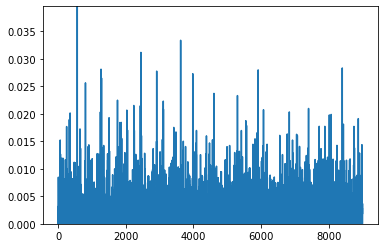

In [37]:
plt.plot(pdf)
plt.ylim([np.min(pdf),np.sort(pdf)[-1]])

term = 0
n_un = 0
for thresh in np.arange(0.000003,0.1,0.000001):
    print(len(pdf[pdf<thresh]), thresh)
    if term < len(pdf[pdf<thresh]) - n_un:
        term = len(pdf[pdf<thresh]) - n_un
        good_th = thresh
        num_5 = len(pdf[pdf<thresh])
    n_un = len(pdf[pdf<thresh])

print('good_th : ', good_th, 'term : ',term, 'num_5 : ', num_5)

In [149]:
#file_name = "n_round  pa   thresh"
file_name = "../submits_log/answer.txt"
with open(file_name,"w") as file:
    for dirName, subdirList, fileList in os.walk(eval_volume_path):
        for i, filename in enumerate(fileList):
            if i != 9000:
                file.write(str(filename))
                file.write(', ')  
                file.write(str(mkde_eval_pred[i]))
                file.write('\n')  
            else:
                file.close()

In [112]:
mkde_eval_pred[:]= 5
print(len(mkde_eval_pred[mkde_eval_pred == 5]))

9000


::::file_name = "soft전 + std_scaler ++ n_round(소수점) __ pa __ threshold,__ output 5 개수(eval data 에서 실제 개수 = 1471개)
(label 5 : 0.16485 = 1483
(label 4 : 0.1654 == 1488)
(label 3 : 0.166 == 1494)
(labael 2 : 0.1658 == 1492
(label 1 : 0.1682 = 1513
(label 0 : 0.1695 = 1525
file_name = soft전 + std_scaler++ 5__1__0.325 __1703//mean // 5없이 돌렸을 때
ACC: 0.8252857142857143


file_name = soft전 + std_scaler++ 5__1__0.325 __1703//mean 
ACC: 0.6857142857142857

file_name = soft전 + std_scaler++ 5__0.1__0.0065 __1432//mean 
ACC: 0.7532857142857143

file_name = soft전 + std_scaler++ 5__0.1__0.003 __793//mean 
ACC: 0.7832857142857143

file_name = soft전 + std_scaler++ 5__0.05__0.002 __1344//mean 

ACC: 0.7564285714285715

file_name = soft전 + std_scaler++ 5__0.05__0.0009 __794//mean 
ACC: 0.7838571428571428

2022-3-22
model = './best_model_noise/10_part2_label6_spcup_save_last.h5', MKDE x, class6 개로 train
ACC: 0.9525714285714286

model = './best_model_noise/64_1024_10_part2_mel_cqt_feature_label_6_model.h5'', MKDE x, class6 개로 train
ACC: 0.9157142857142857


2022-03-24
model = './part2_code/best_model_noise/10_part2_label6_spcup_save_last.h5' class 6개로 train 
mkde o / pa : 0.03 / th : 6e-7
label 별 length ///
mkde x :  1484  1504  1561  1503  1800  1148  
mkde o :  1455  1489  1549  1498  1729  1280   

ACC: 0.9495714285714286

model = './part2_code/best_model_noise/10_part2_label6_spcup_save_last.h5' class 6개로 train 
mkde o / pa : 0.03 / th :[5e-08,5e-07,2e-06,0.5e-07,6e-06]
label 별 length ///
mkde x :  1484  1504  1561  1503  1800  1148  
mkde o :  1478  1490  1538  1501  1624  1369  
ACC: 0.9511428571428572

model = './part2_code/best_model_noise/10_part2_label6_spcup_save_last.h5' class 6개로 train 
mkde o / pa : 0.03 / th :[5e-09,5e-07,2e-06,0.5e-07,6e-07]
label 별 length ///
mkde x :  1484  1504  1561  1503  1800  1148  
mkde o :  1483  1490  1538  1501  1729  1259  
ACC: 0.9524285714285714

2022-03-25

model = './part2_code/best_model_noise/10_part2_label6_spcup_save_last.h5' class 6개로 train 
mkde o / pa : 0.03 / th :[0 , 0 ,0, 0 ,6e-07]
label 별 length ///
eval   :  1525  1513  1492  1494  1488  1483  
mkde x :  1484  1504  1561  1503  1800  1148  
mkde o :  1484  1504  1561  1503  1729  1219  
ACC: 0.955

model = './part2_code/best_model_noise/10_part2_label6_spcup_save_last.h5' class 6개로 train 
mkde o / pa : 0.03 / th :[0 , 0 ,0, 0 ,1e-05]
label 별 length ///
eval   :  1525  1513  1492  1494  1488  1483  
mkde x :  1484  1504  1561  1503  1800  1148  
mkde o :  1484  1504  1561  1503  1593  1355 
ACC: 0.9528571428571428

model = './part2_code/best_model_noise/10_part2_label6_spcup_save_last.h5' class 6개로 train 
mkde o / pa : 0.03 / th :[0 , 0 ,1e-05, 0 ,5e-06]
label 별 length ///
eval   :  1525  1513  1492  1494  1488  1483  
mkde x :  1484  1504  1561  1503  1800  1148  
mkde o :  1484  1504  1508  1503  1635  1366  
ACC: 0.9517142857142857

model = './part2_code/best_model_noise/10_part2_label6_spcup_save_last.h5' class 6개로 train 
mkde o / pa : 0.03 / th :[0 , 0 ,1e-05, 0 ,5e-06]
label 별 length ///
eval   :  1525  1513  1492  1494  1488  1483  
mkde x :  1484  1504  1561  1503  1800  1148  
mkde o :  1484  1504  1508  1503  1635  1366  
ACC: 0.9518571428571428

model = './part2_code/best_model_noise/10_part2_label6_spcup_save_last.h5' class 6개로 train 
mkde o / pa : 0.03 / th :[0 , 0 , 0 , 0 ,3e-07]
label 별 length ///
eval   :  1525  1513  1492  1494  1488  1483  
mkde x :  1484  1504  1561  1503  1800  1148  
mkde o :  1484  1504  1561  1503  1752  1196 
ACC: 0.9544285714285714

model = './part2_code/best_model_noise/10_part2_label6_spcup_save_last.h5' class 6개로 train 
mkde o / pa : 0.03 / th :[0 , 0 , 0 , 0 ,5e-06]
label 별 length ///
eval   :  1525  1513  1492  1494  1488  1483  
mkde x :  1484  1504  1561  1503  1800  1148  
mkde o :  1484  1504  1561  1503  1635  1313 
ACC: 0.9518571428571428